In [1]:
!pip install fsspec
!pip install s3fs
!pip install japanize_matplotlib

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 6.5MB 6.4MB/s 
     |████████████████████████████████| 1.3MB 45.0MB/s 
     |████████████████████████████████| 552kB 47.8MB/s 
     |████████████████████████████████| 296kB 44.5MB/s 
     |████████████████████████████████| 143kB 46.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=7fab75754f9ebb622552ce1ba6685b7b4db61b8ac802134c884644ce78aaa8e5
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
     |████████████████████████████████| 4.1MB 5.7MB/s 
  Created wheel for japanize-matplotl

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime
import numpy as np
from fastprogress import progress_bar as pb
import seaborn as sns
sns.set(font="IPAexGothic")

In [3]:
import warnings
warnings.simplefilter('ignore')

In [5]:
df = pd.read_csv('s3://fin-app/company_data/company_financial_data.csv')

In [6]:
df

EDINETコード   証券コード         提出日  ...         有利子負債         会社名      業種
0        E01656  7986.0  2016-03-30  ...  0.000000e+00  日本アイ・エス・ケイ   その他製品
1        E01656  7986.0  2017-03-30  ...  0.000000e+00  日本アイ・エス・ケイ   その他製品
2        E01656  7986.0  2018-03-29  ...  0.000000e+00  日本アイ・エス・ケイ   その他製品
3        E01656  7986.0  2019-03-28  ...  0.000000e+00  日本アイ・エス・ケイ   その他製品
4        E01656  7986.0  2020-03-26  ...  0.000000e+00  日本アイ・エス・ケイ   その他製品
...         ...     ...         ...  ...           ...         ...     ...
15956    E30047  3679.0  2016-06-29  ...  3.912212e+09         じげん  情報・通信業
15957    E30047  3679.0  2017-06-29  ...  0.000000e+00         じげん  情報・通信業
15958    E30047  3679.0  2018-06-29  ...  0.000000e+00         じげん  情報・通信業
15959    E30047  3679.0  2019-06-28  ...  0.000000e+00         じげん  情報・通信業
15960    E30047  3679.0  2020-06-30  ...  0.000000e+00         じげん  情報・通信業

[15961 rows x 88 columns]

In [7]:
df['会計期間終了日'] = pd.to_datetime(df['会計期間終了日'])
df['提出日'] = pd.to_datetime(df['提出日'])

In [8]:
df.columns

Index(['EDINETコード', '証券コード', '提出日', '会計期間終了日', '従業員数', '平均臨時雇用人員', '所有株式数',
       '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数', '１株当たり純資産',
       '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産',
       '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金',
       '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金', '純資産', '株主資本',
       '資本金', '資本剰余金', '利益剰余金', '自己株式', '評価・換算差額等', '売上高', '売上原価', '売上総利益',
       '販売費及び一般管理費', '給料及び手当', '減価償却費、販売費及び一般管理費', '研究開発費', '営業利益', '営業外収益',
       '営業外費用', '支払利息', '経常利益', '特別利益', '特別損失', '税引前純利益', '法人税等', '純利益',
       '親会社株主に帰属する純利益', '包括利益', '１株当たり純利益', '調整1株当たり純利益', '１株当たり配当額', '株価収益率',
       '自己資本利益率', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー',
       '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '現金及び現金同等物の増減', '前期資産', '前期売上高',
       '前期純利益', '平均年齢', '平均勤続年数', '平均年間給与', '粗利益', '売上高総利益率', '売上高営業利益率',
       '売上高経常利益率', '売上高販管費率', '総資本回転率', '流動比率', '売上高変化率', '純利益変化率', '期首期末平均資産',
       '総資産経常利益率', '総

In [44]:
target_cols = ['従業員数', '平均臨時雇用人員', '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '連結子会社の数', '１株当たり純資産',
       '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産',
       '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金',
       '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金', '純資産', '株主資本',
       '資本金', '資本剰余金', '利益剰余金', '自己株式', '評価・換算差額等', '売上高', '売上原価', '売上総利益',
       '販売費及び一般管理費', '給料及び手当', '減価償却費、販売費及び一般管理費', '研究開発費', '営業利益', '営業外収益',
       '営業外費用', '支払利息', '経常利益', '特別利益', '特別損失', '税引前純利益', '法人税等', '純利益',
       '親会社株主に帰属する純利益', '包括利益', '１株当たり純利益', '調整1株当たり純利益', '株価収益率',
       '自己資本利益率', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー',
       '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '現金及び現金同等物の増減', '前期資産', '前期売上高',
       '前期純利益', '平均年齢', '平均勤続年数', '平均年間給与', '粗利益', '売上高総利益率', '売上高営業利益率',
       '売上高経常利益率', '売上高販管費率', '総資本回転率', '流動比率', '売上高変化率', '純利益変化率', '期首期末平均資産',
       '総資産経常利益率', '総資産純利益率', '総資産親会社株主に帰属する純利益率', '自己資本', '有利子負債']

In [11]:
latest_subdates_mask = (df.groupby(['証券コード'])['会計期間終了日'].transform('max') == df['会計期間終了日'])
df_latest = df[latest_subdates_mask]

In [12]:
df_latest

EDINETコード   証券コード        提出日  ...         有利子負債            会社名      業種
4        E01656  7986.0 2020-03-26  ...  0.000000e+00     日本アイ・エス・ケイ   その他製品
9        E05256  4336.0 2020-06-25  ...  8.600000e+07        クリエアナブキ   サービス業
14       E02632  7459.0 2020-06-25  ...  3.428600e+10  メディパルホールディングス     卸売業
19       E03512  3082.0 2020-09-28  ...  5.958454e+09    きちりホールディングス     小売業
24       E02728  9888.0 2020-06-19  ...  9.465675e+09            ＵＥＸ     卸売業
...         ...     ...        ...  ...           ...            ...     ...
15940    E01591  6376.0 2020-03-30  ...  0.000000e+00            日機装    精密機器
15945    E00447  2872.0 2020-05-22  ...  0.000000e+00          セイヒョー     食料品
15950    E02055  6797.0 2020-06-24  ...  0.000000e+00        名古屋電機工業    電気機器
15955    E31815  3418.0 2020-10-30  ...  5.310798e+09         バルニバービ   サービス業
15960    E30047  3679.0 2020-06-30  ...  0.000000e+00            じげん  情報・通信業

[3342 rows x 88 columns]

In [13]:
df_latest.set_index('証券コード', inplace=True)

In [63]:
from fastprogress import progress_bar as pb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [67]:
df_cluster = pd.DataFrame(
    index=df_latest.index
)
inertias = []

n_clusters = [2, 3, 4, 6, 8, 10, 15, 20, 30, 40, 60, 100, 200]

for nc in pb(n_clusters):
    km = KMeans(n_clusters=nc).fit(MinMaxScaler().fit_transform(df_latest[target_cols].fillna(df_latest.mean())))
    df_cluster[f'cluster_kmean_{nc}'] = km.predict(MinMaxScaler().fit_transform(df_latest[target_cols].fillna(df_latest.mean())))
    inertias.append(km.inertia_)

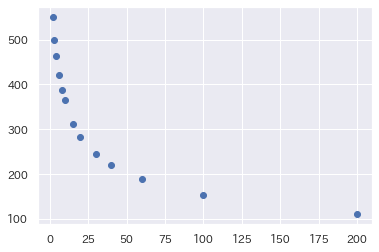

In [68]:
plt.scatter(n_clusters, inertias)

In [69]:
df_cluster

cluster_kmean_2  cluster_kmean_3  ...  cluster_kmean_100  cluster_kmean_200
証券コード                                     ...                                      
7986.0                1                1  ...                 86                 59
4336.0                0                0  ...                 41                105
7459.0                1                1  ...                 87                 89
3082.0                0                0  ...                 91                 67
9888.0                1                1  ...                 71                 33
...                 ...              ...  ...                ...                ...
6376.0                1                1  ...                  5                154
2872.0                1                1  ...                  5                164
6797.0                1                1  ...                  0                103
3418.0                0                0  ...                 91                 67
3679.0                0                0  ...                 67                176

[3342 rows x 13 columns]

Text(0.5, 0, 'cluster label')

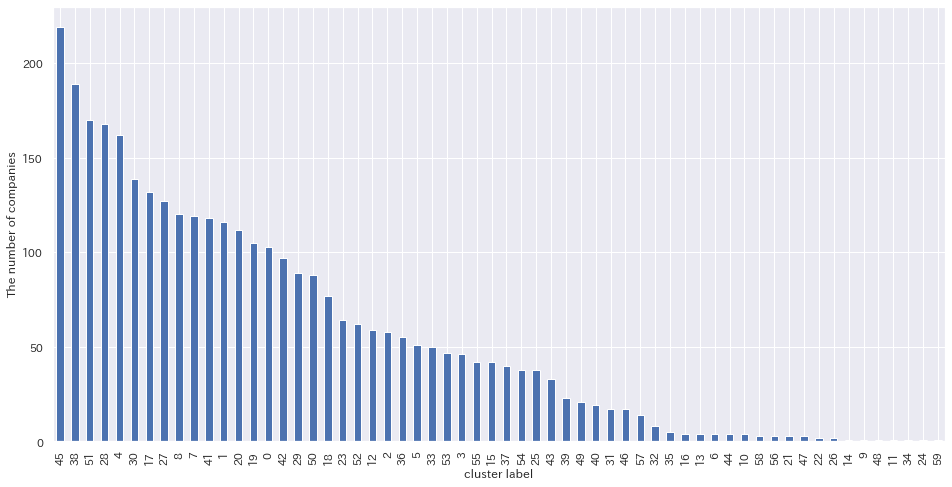

In [76]:
plt.figure(figsize=(16, 8))
df_cluster['cluster_kmean_60'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel('The number of companies')
plt.xlabel('cluster label')

In [113]:
df_feat_cluster = pd.merge(df_latest, df_cluster, how='left', left_index=True, right_index=True)

In [115]:
df_feat_cluster.head()

EDINETコード        提出日  ... cluster_kmean_100  cluster_kmean_200
証券コード                        ...                                     
7986.0    E01656 2020-03-26  ...                86                 59
4336.0    E05256 2020-06-25  ...                41                105
7459.0    E02632 2020-06-25  ...                87                 89
3082.0    E03512 2020-09-28  ...                91                 67
9888.0    E02728 2020-06-19  ...                71                 33

[5 rows x 100 columns]

In [140]:
def describe_cluster_characteristic(cluster_label: int, df_feat_cluster, num_cluster=60):
    df_cluster_group = df_feat_cluster.groupby(['cluster_kmean_60']).mean().transpose()
    df_cluster_group = pd.merge(df_cluster_group, df_latest.mean().to_frame('whole_mean'), how='left', left_index=True, right_index=True)
    cluster_labels = list(range(num_cluster))
    for cl in cluster_labels:
        df_cluster_group[f'mean_diff_rate_c{cl}'] = (df_cluster_group.iloc[:, cl] - df_cluster_group.loc[:, 'whole_mean']) / df_cluster_group.loc[:, 'whole_mean']
    df_cluster_group = df_cluster_group.transpose()[target_cols].transpose()

    feat_rank = df_cluster_group[f'mean_diff_rate_c{cluster_label}'].dropna().sort_values(ascending=False)

    print(f'{len(df_feat_cluster[df_feat_cluster[f"cluster_kmean_{num_cluster}"]==cluster_label])} companies in cluster {cluster_label}')
    plt.figure(figsize=(12, 18))
    feat_rank.plot.barh()
    plt.xlabel('(クラスタ平均 - 全体平均) / 全体平均')
    plt.show()
    print(df_feat_cluster[df_feat_cluster[f"cluster_kmean_{num_cluster}"]==cluster_label][['会社名', '業種']].sort_index())

58 companies in cluster 2
                      会社名        業種
証券コード                              
1443.0         技研ホールディングス       建設業
1720.0               東急建設       建設業
1721.0       コムシスホールディングス       建設業
1826.0               佐田建設       建設業
1867.0                植木組       建設業
2288.0               丸大食品       食料品
2531.0          宝ホールディングス       食料品
2778.0       パレモ・ホールディングス       小売業
3099.0      三越伊勢丹ホールディングス       小売業
3105.0        日清紡ホールディングス      電気機器
3107.0      ダイワボウホールディングス       卸売業
3205.0          ダイドーリミテッド      繊維製品
3417.0    大木ヘルスケアホールディングス       卸売業
3431.0     宮地エンジニアリンググループ      金属製品
3577.0               東海染工      繊維製品
3591.0       ワコールホールディングス      繊維製品
3612.0               ワールド       卸売業
3864.0               三菱製紙     パルプ・紙
4203.0           住友ベークライト        化学
4635.0              東京インキ        化学
4671.0       ファルコホールディングス     サービス業
5103.0         昭和ホールディングス      ゴム製品
5202.0              日本板硝子  ガラス・土石製品
5216.0              倉元製作所  ガラス・土石製品
5288.0     アジアパイルホールディングス  ガラス・土石製品
56

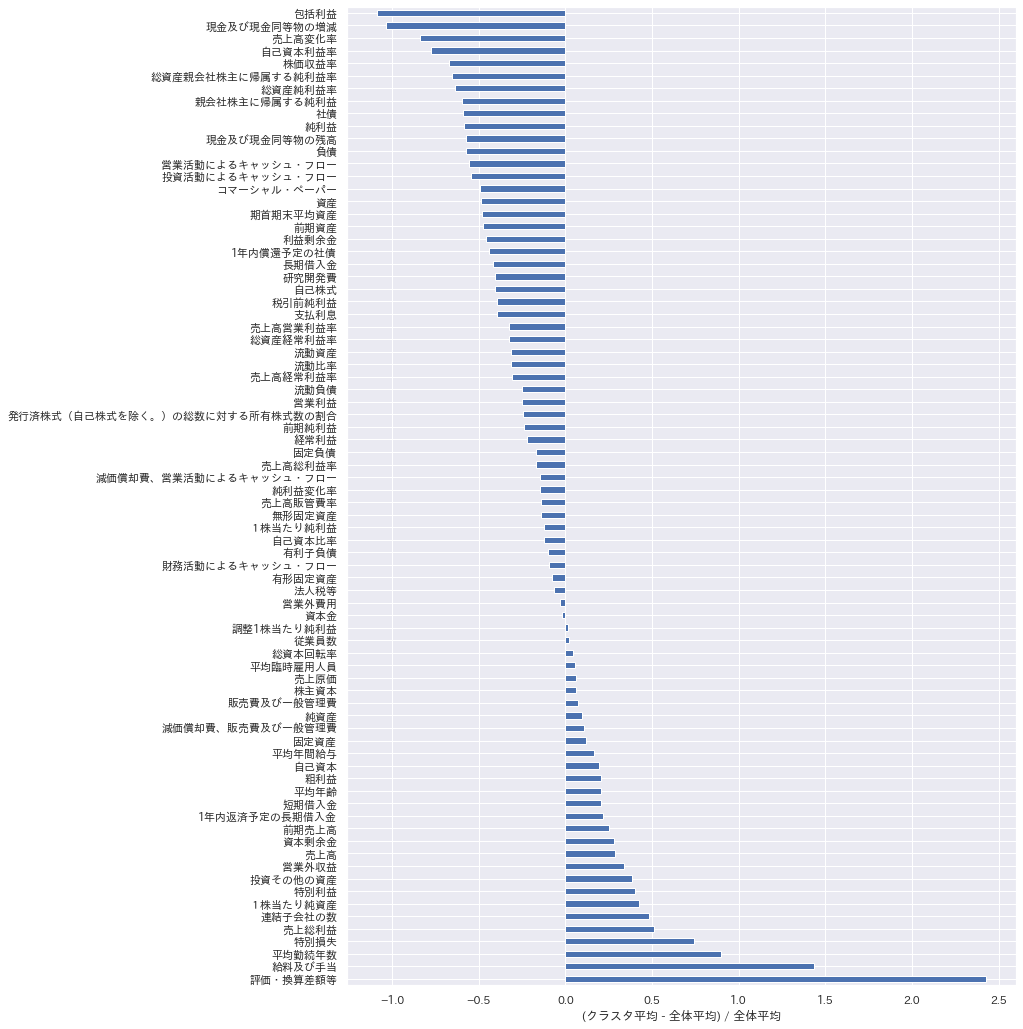

In [138]:
describe_cluster_characteristic(2, df_feat_cluster)

219 companies in cluster 45


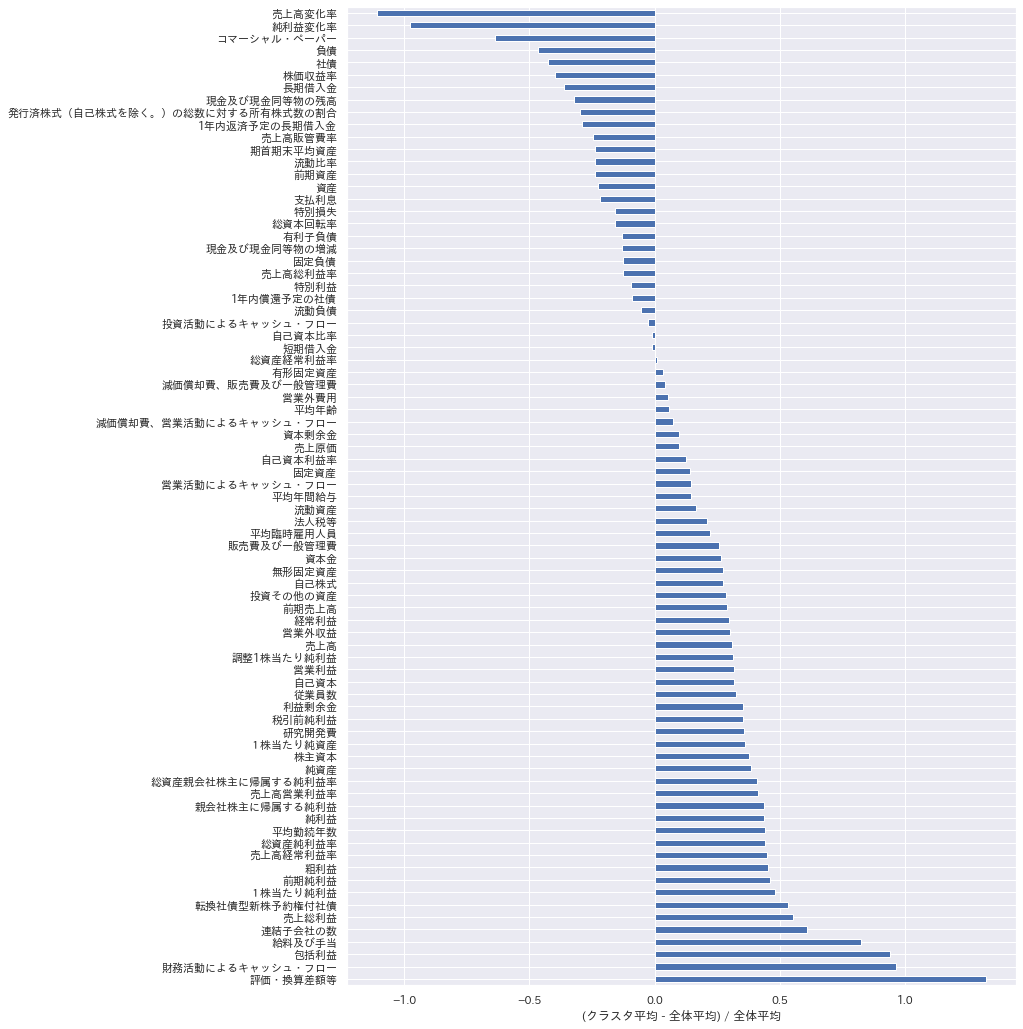

                  会社名      業種
証券コード                        
1417.0  ミライト・ホールディングス     建設業
1734.0           北弘電社     建設業
1810.0           松井建設     建設業
1813.0          不動テトラ     建設業
1820.0           西松建設     建設業
...               ...     ...
9827.0           リリカラ     卸売業
9832.0     オートバックスセブン     卸売業
9889.0   ＪＢＣＣホールディングス  情報・通信業
9929.0           平和紙業     卸売業
9948.0           アークス     小売業

[219 rows x 2 columns]
189 companies in cluster 38


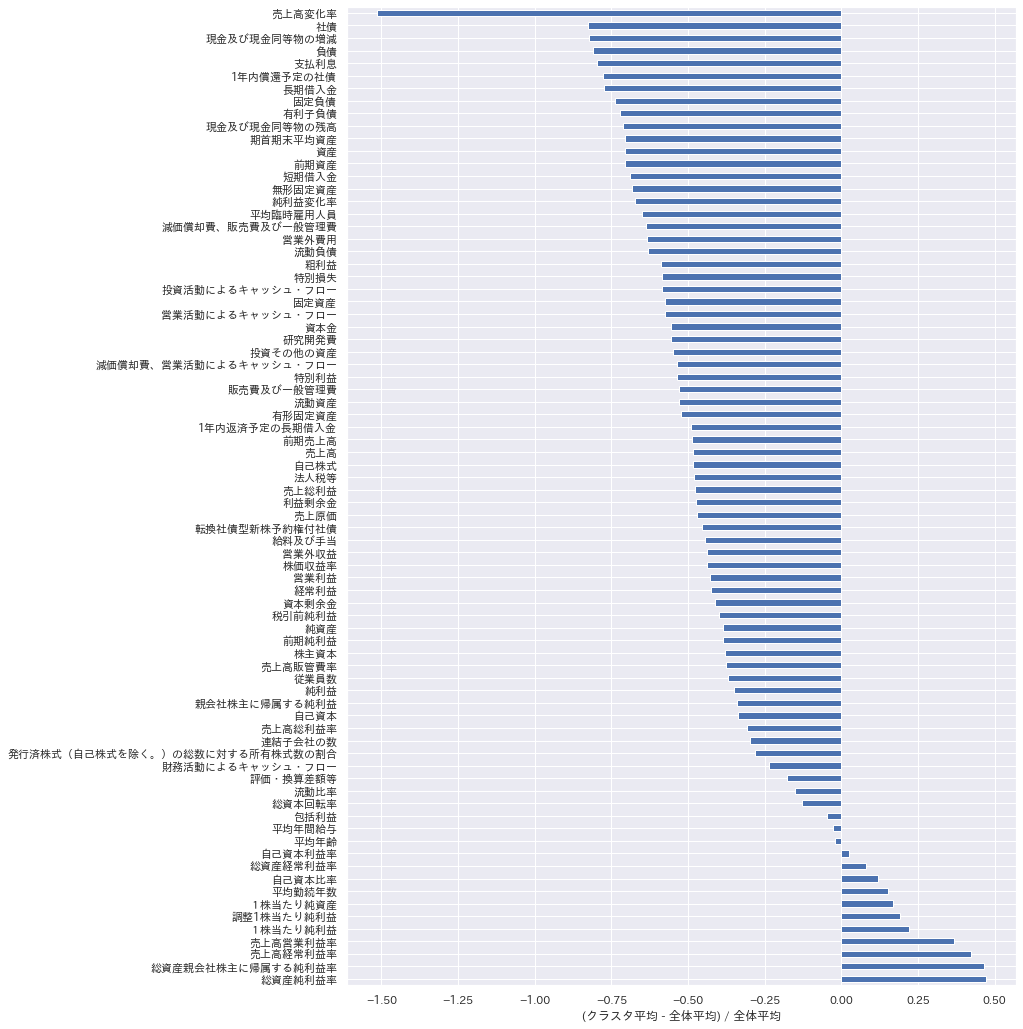

           会社名      業種
証券コード                 
1376.0   カネコ種苗  水産・農林業
1379.0     ホクト  水産・農林業
1828.0    田辺工業     建設業
1835.0    東鉄工業     建設業
1887.0  日本国土開発     建設業
...        ...     ...
9930.0    北沢産業     卸売業
9932.0    杉本商事     卸売業
9934.0  因幡電機産業     卸売業
9982.0   タキヒヨー     卸売業
9995.0   グローセル     卸売業

[189 rows x 2 columns]
170 companies in cluster 51


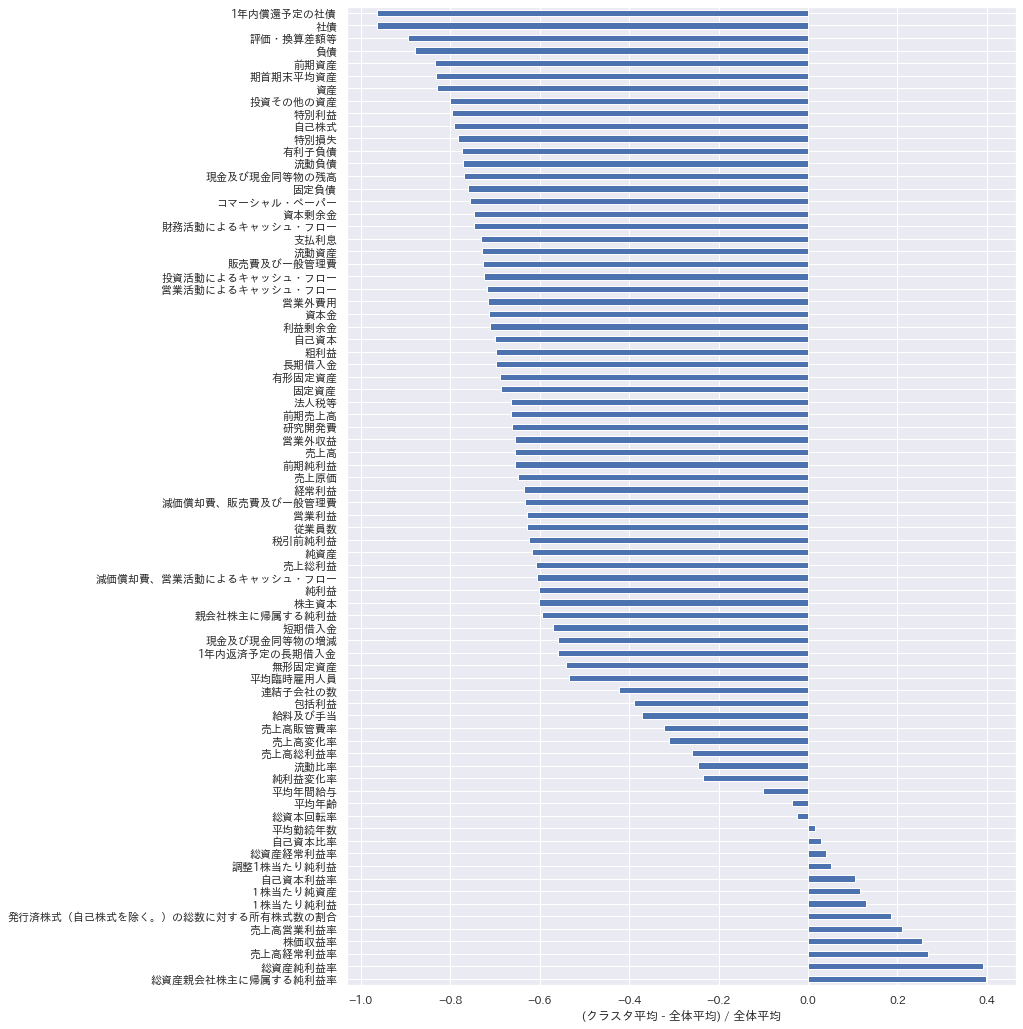

                    会社名   業種
証券コード                       
1384.0            ホクリヨウ  食料品
1438.0             岐阜造園  建設業
1738.0             ニットー  建設業
1758.0           太洋基礎工業  建設業
1762.0  髙松コンストラクショングループ  建設業
...                 ...  ...
9878.0              セキド  小売業
9906.0             藤井産業  卸売業
9914.0             植松商会  卸売業
9966.0               藤久  小売業
9977.0          アオキスーパー  小売業

[170 rows x 2 columns]
168 companies in cluster 28


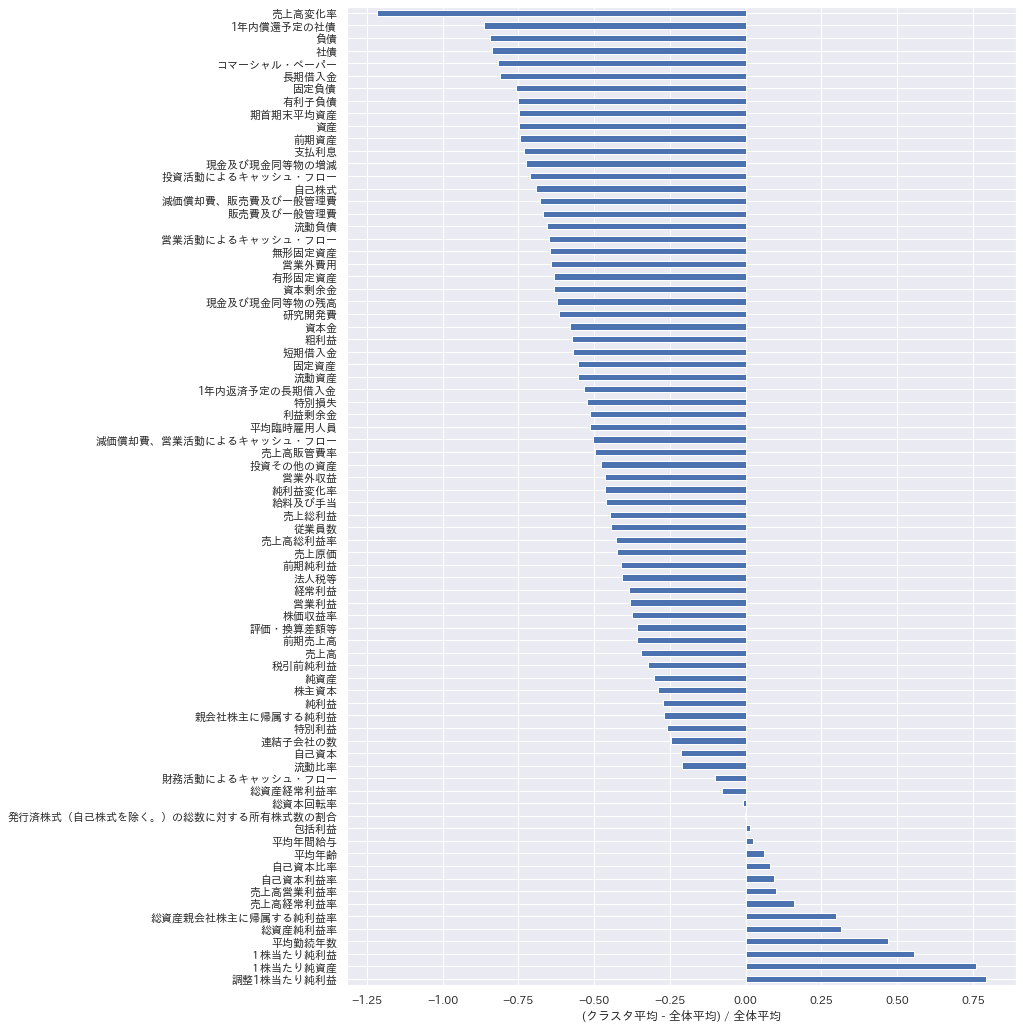

                会社名   業種
証券コード                   
1515.0         日鉄鉱業   鉱業
1736.0        オーテック  建設業
1743.0       コーアツ工業  建設業
1768.0         ソネック  建設業
1780.0         ヤマウラ  建設業
...             ...  ...
9885.0         シャルレ  卸売業
9895.0        コンセック  卸売業
9919.0  関西スーパーマーケット  小売業
9993.0         ヤマザワ  小売業
9996.0        サトー商会  卸売業

[168 rows x 2 columns]
162 companies in cluster 4


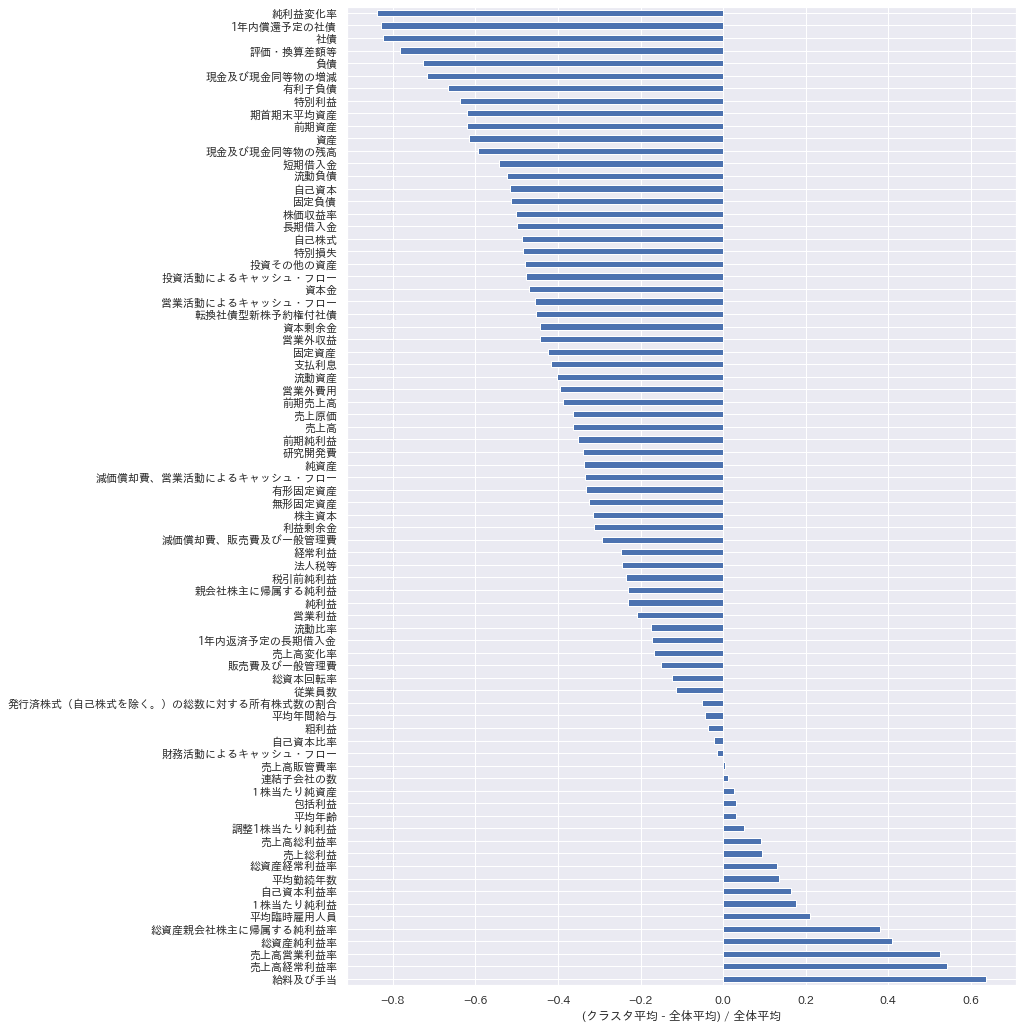

            会社名   業種
証券コード               
1723.0     日本電技  建設業
1771.0   日本乾溜工業  建設業
1788.0    三東工業社  建設業
1795.0      マサル  建設業
1799.0   第一建設工業  建設業
...         ...  ...
9850.0    グルメ杵屋  小売業
9909.0     愛光電気  卸売業
9941.0     太洋物産  卸売業
9943.0  ココスジャパン  小売業
9945.0     プレナス  小売業

[162 rows x 2 columns]
139 companies in cluster 30


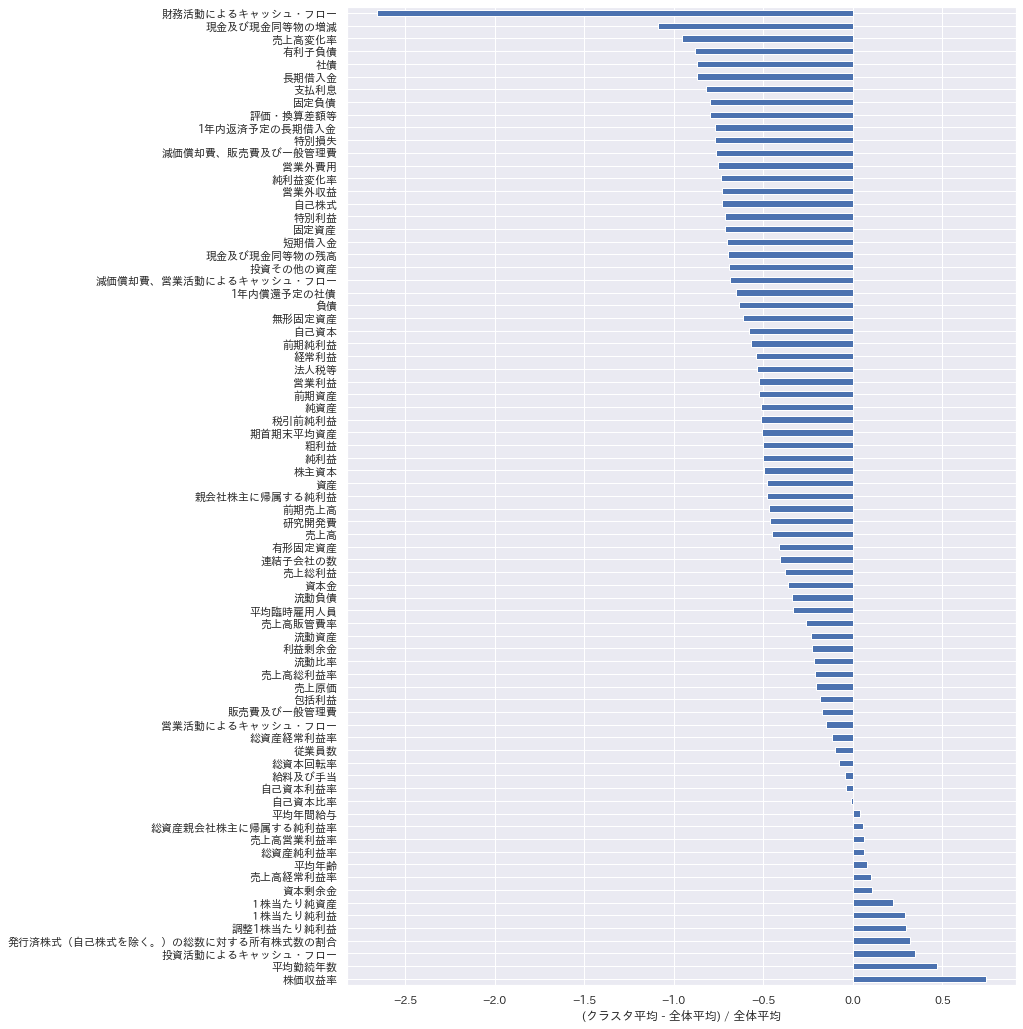

            会社名   業種
証券コード               
1775.0  富士古河Ｅ＆Ｃ  建設業
1776.0   三井住建道路  建設業
1777.0   川崎設備工業  建設業
1787.0  ナカボーテック  建設業
1793.0      大本組  建設業
...         ...  ...
9835.0  ジュンテンドー  小売業
9846.0   天満屋ストア  小売業
9867.0     ソレキア  卸売業
9903.0     カンセキ  小売業
9991.0     ジェコス  卸売業

[139 rows x 2 columns]
132 companies in cluster 17


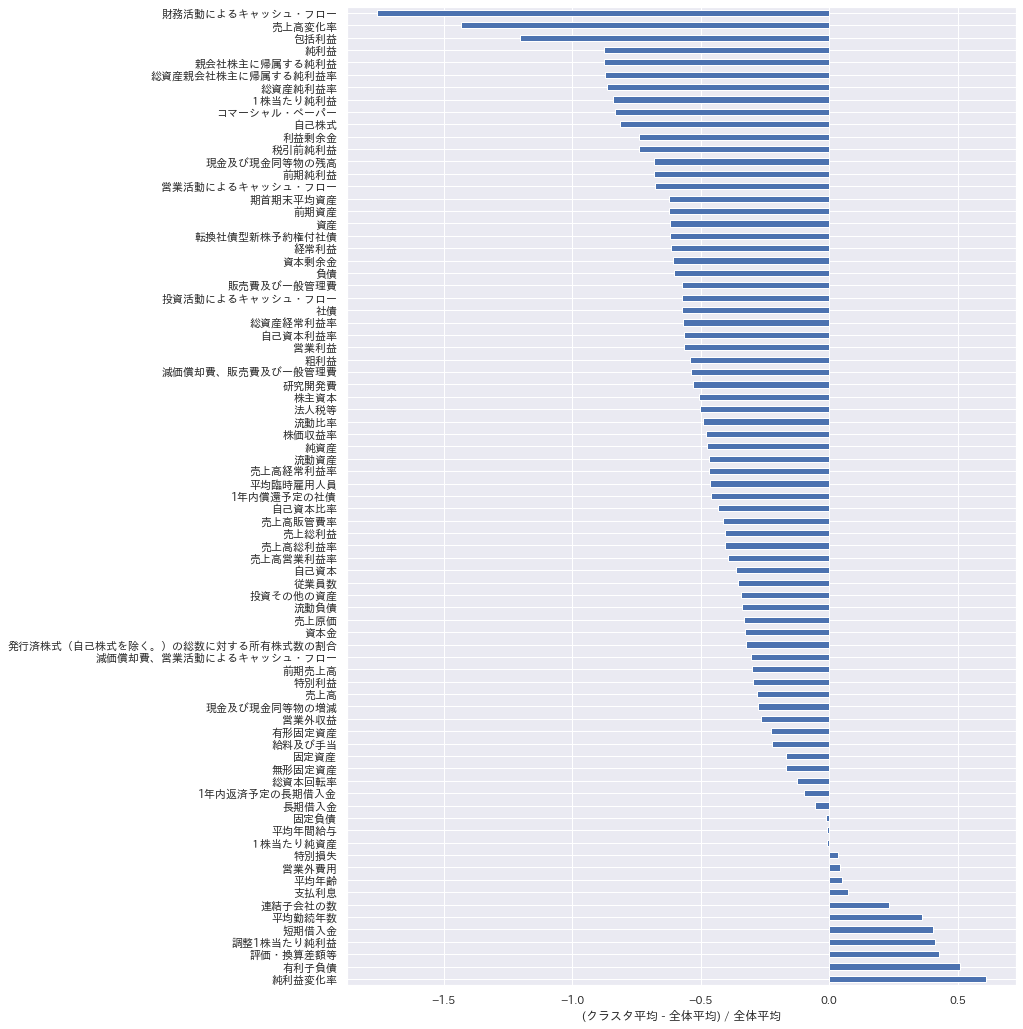

           会社名      業種
証券コード                 
1332.0    日本水産  水産・農林業
1333.0  マルハニチロ  水産・農林業
1724.0  シンクレイヤ     建設業
1805.0    飛島建設     建設業
1815.0    鉄建建設     建設業
...        ...     ...
9722.0    藤田観光   サービス業
9761.0   東海リース   サービス業
9767.0    日建工学   サービス業
9857.0      英和     卸売業
9888.0     ＵＥＸ     卸売業

[132 rows x 2 columns]
127 companies in cluster 27


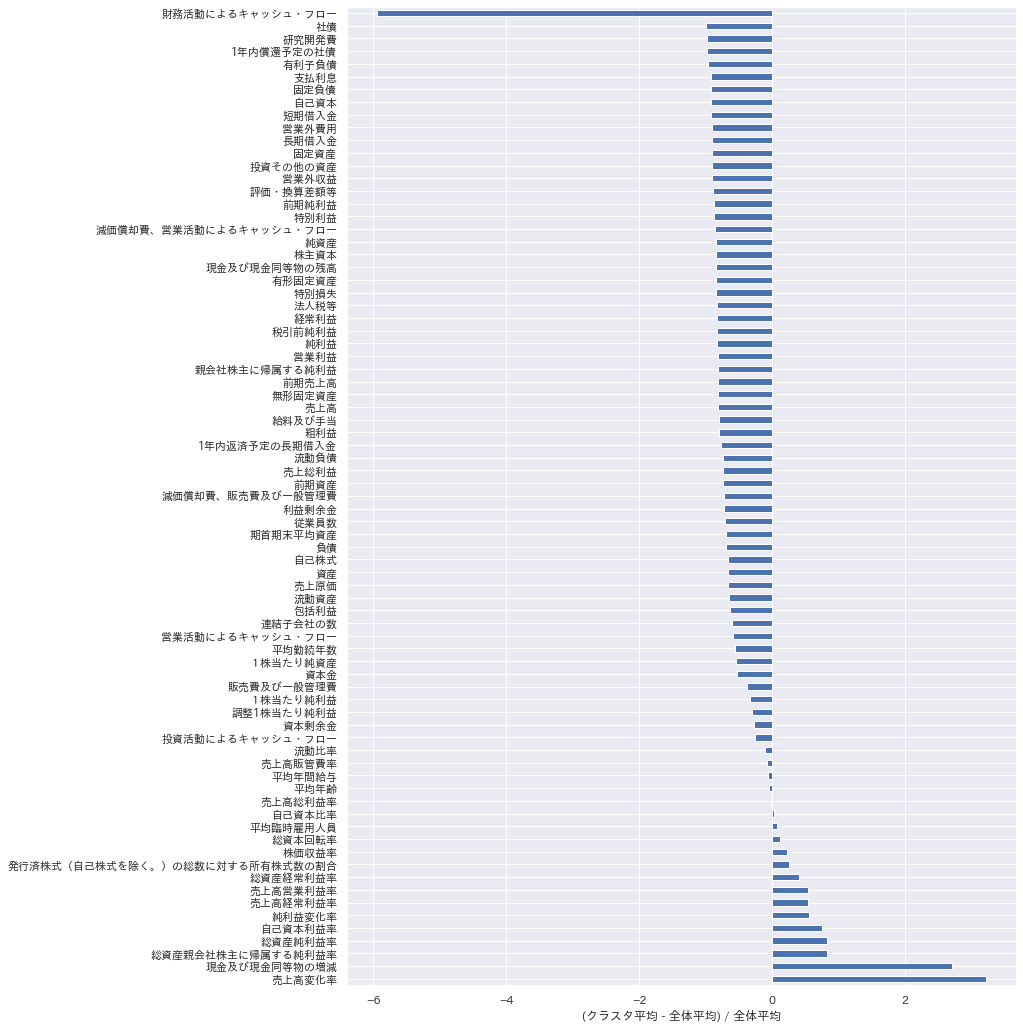

                         会社名      業種
証券コード                               
1436.0                  フィット     建設業
1439.0                 安江工務店     建設業
1446.0                キャンディル     建設業
1764.0                  工藤建設     建設業
1766.0            東建コーポレーション     建設業
...                      ...     ...
9435.0                   光通信  情報・通信業
9466.0  アイドママーケティングコミュニケーション  情報・通信業
9766.0           コナミホールディングス  情報・通信業
9769.0                   学究社   サービス業
9788.0                   ナック   サービス業

[127 rows x 2 columns]
120 companies in cluster 8


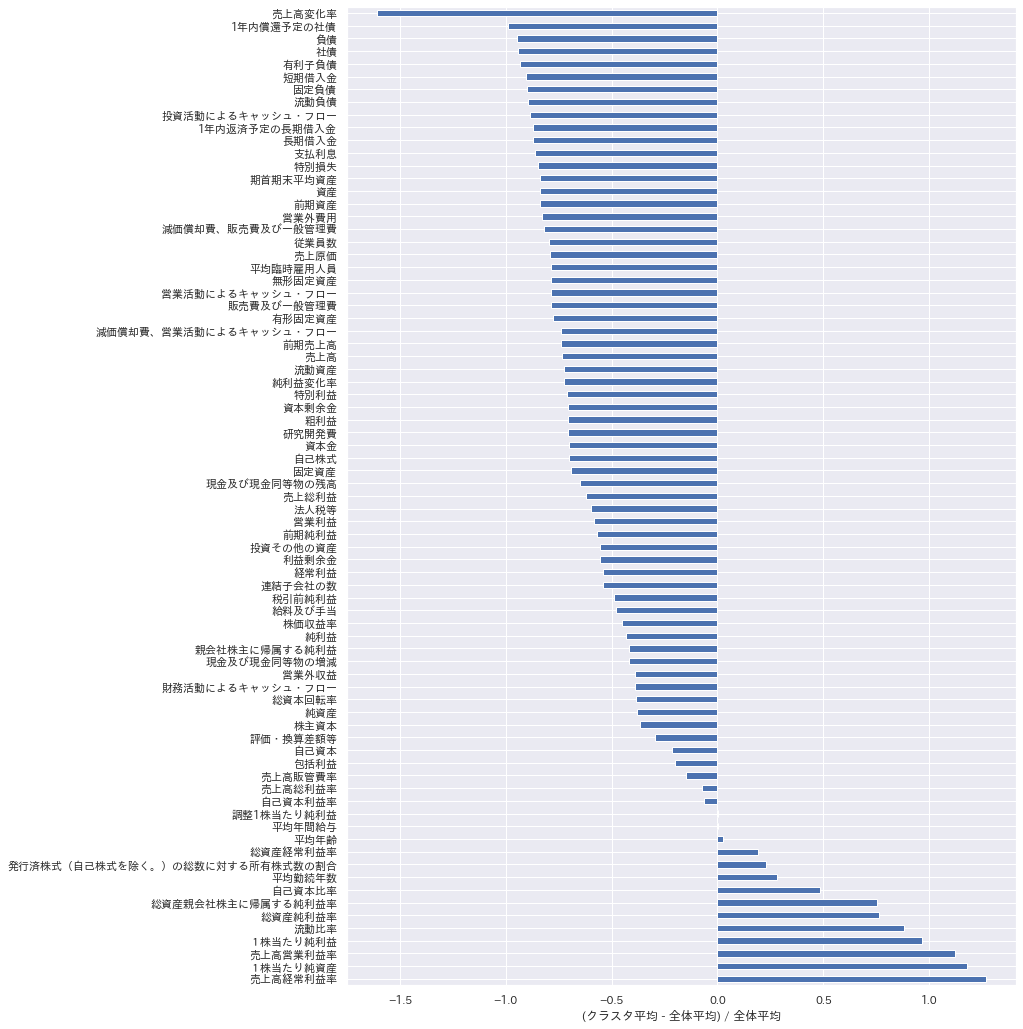

                会社名      業種
証券コード                      
1662.0       石油資源開発      鉱業
1663.0  Ｋ＆Ｏエナジーグループ      鉱業
1883.0         前田道路     建設業
1941.0          中電工     建設業
2003.0       日東富士製粉     食料品
...             ...     ...
9672.0        東京都競馬   サービス業
9692.0       シーイーシー  情報・通信業
9708.0        帝国ホテル   サービス業
9739.0    日本システムウエア  情報・通信業
9758.0     ジャパンシステム  情報・通信業

[120 rows x 2 columns]
119 companies in cluster 7


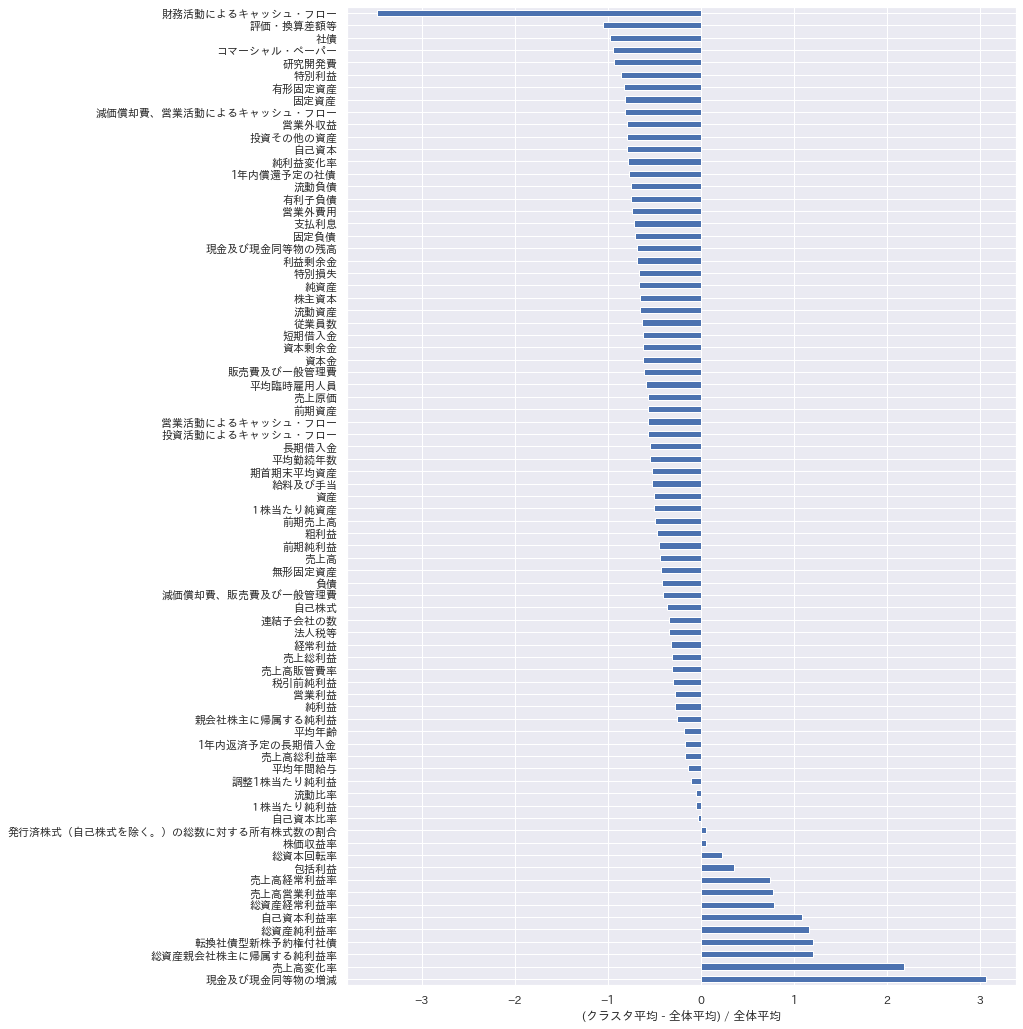

                  会社名      業種
証券コード                        
1401.0         エムビーエス     建設業
2183.0           リニカル   サービス業
2292.0          エスフーズ     食料品
2301.0             学情   サービス業
2305.0        スタジオアリス   サービス業
...               ...     ...
8935.0    エフ・ジェー・ネクスト    不動産業
9266.0  一家ダイニングプロジェクト     小売業
9749.0          富士ソフト  情報・通信業
9974.0            ベルク     小売業
9989.0         サンドラッグ     小売業

[119 rows x 2 columns]
118 companies in cluster 41


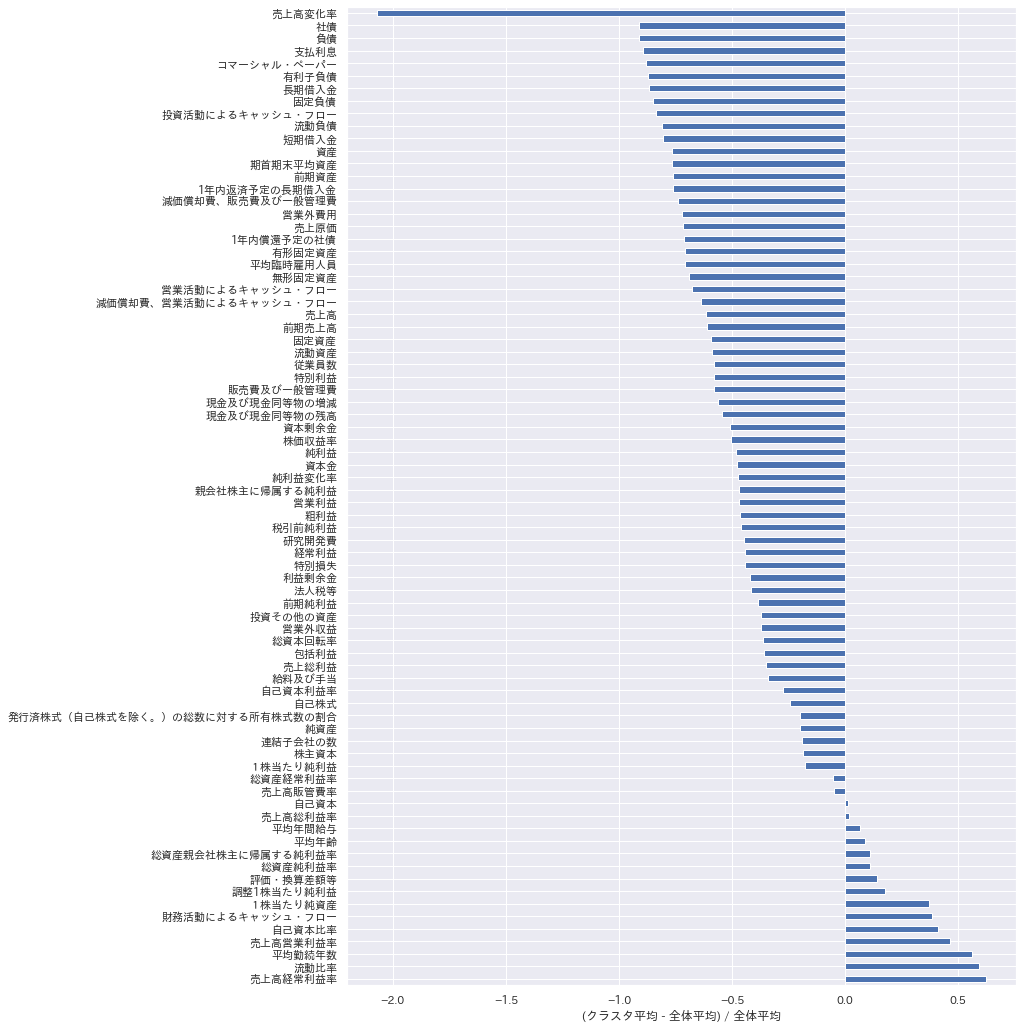

                   会社名      業種
証券コード                         
1414.0  ショーボンドホールディングス     建設業
1514.0      住石ホールディングス      鉱業
1914.0          日本基礎技術     建設業
1921.0       巴コーポレーション     建設業
1945.0          東京エネシス     建設業
...                ...     ...
9543.0            静岡ガス  電気・ガス業
9742.0            アイネス  情報・通信業
9755.0            応用地質   サービス業
9768.0             いであ   サービス業
9882.0         イエローハット     卸売業

[118 rows x 2 columns]
116 companies in cluster 1


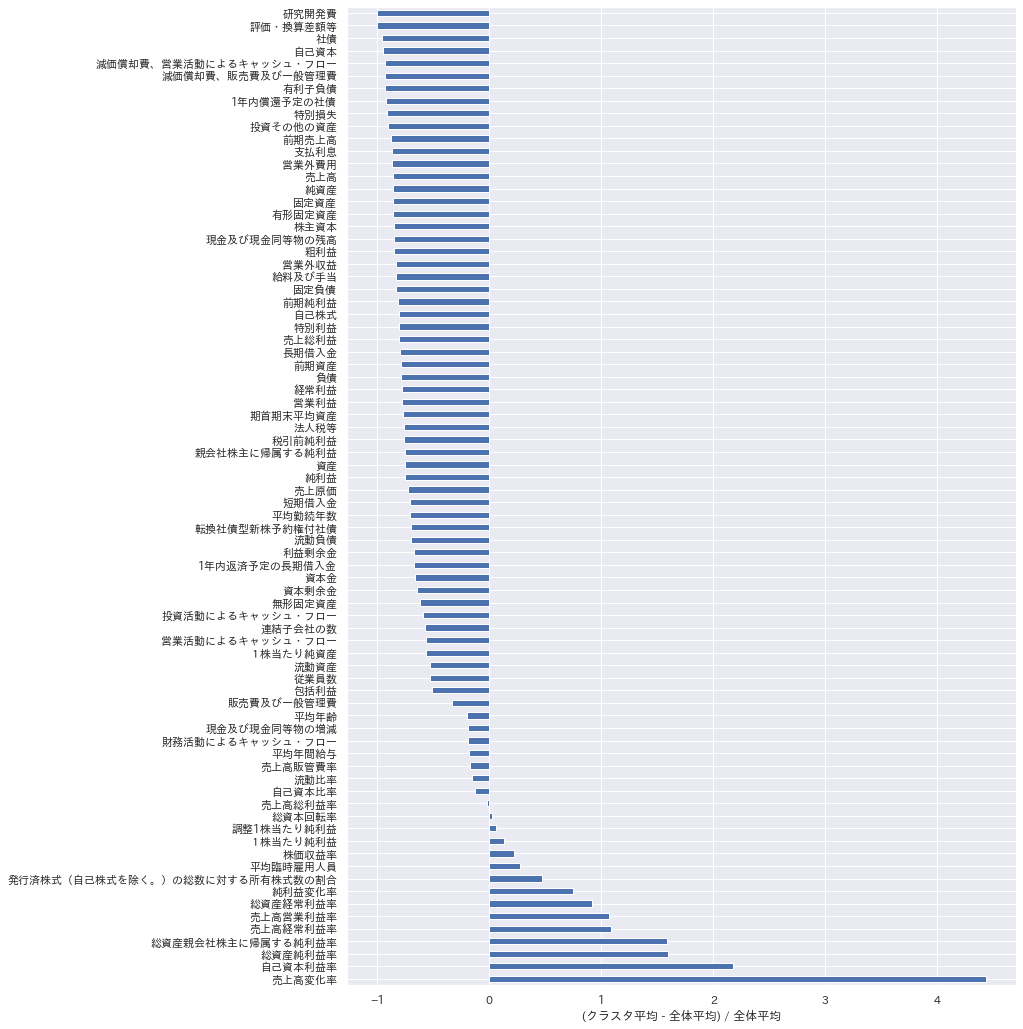

                会社名      業種
証券コード                      
1429.0        日本アクア     建設業
1431.0     Ｌｉｂ　Ｗｏｒｋ     建設業
1449.0     ＦＵＪＩジャパン     建設業
1739.0        シード平和     建設業
2120.0       ＬＩＦＵＬＬ   サービス業
...             ...     ...
9422.0        コネクシオ  情報・通信業
9428.0        クロップス  情報・通信業
9441.0        ベルパーク  情報・通信業
9467.0      アルファポリス  情報・通信業
9983.0  ファーストリテイリング     小売業

[116 rows x 2 columns]
112 companies in cluster 20


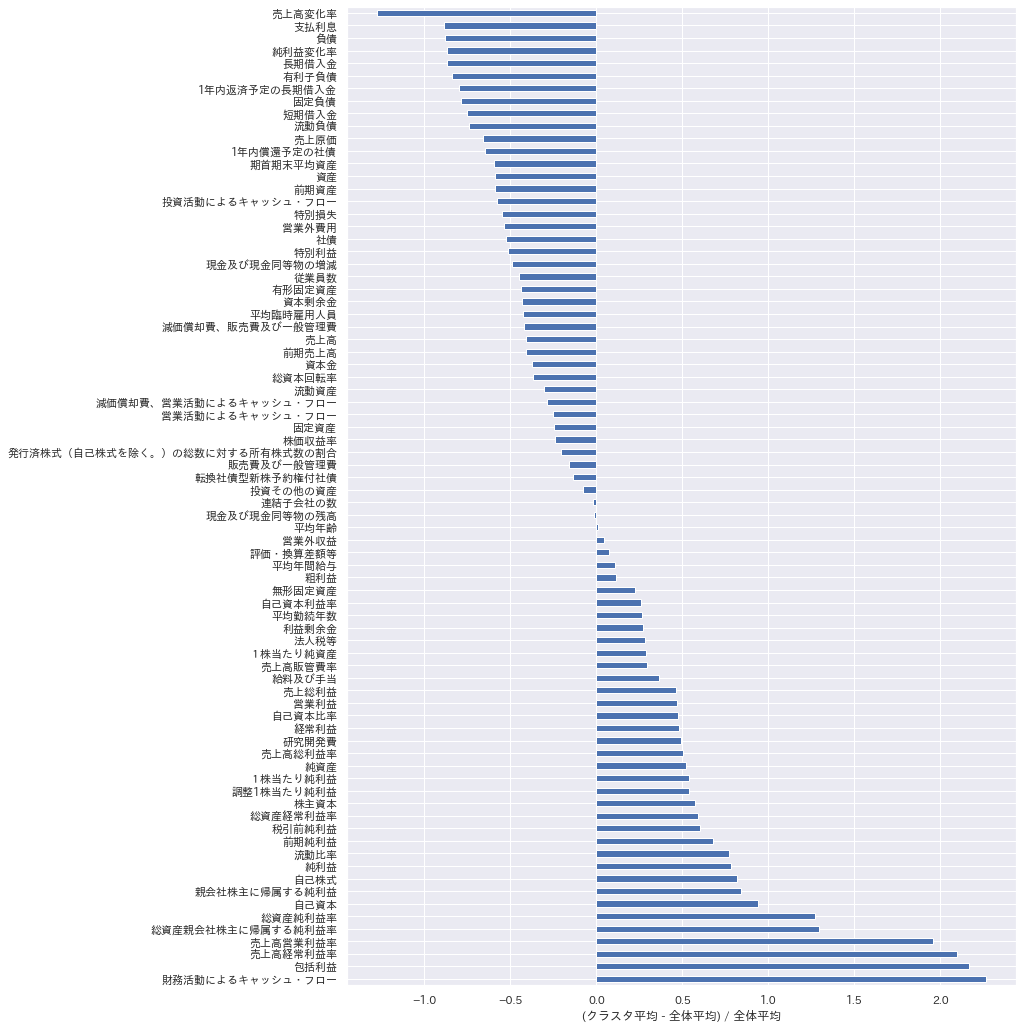

                会社名      業種
証券コード                      
1377.0       サカタのタネ  水産・農林業
1976.0         明星工業     建設業
2206.0        江崎グリコ     食料品
2221.0         岩塚製菓     食料品
2229.0         カルビー     食料品
...             ...     ...
9843.0  ニトリホールディングス     小売業
9854.0           愛眼     小売業
9900.0  サガミホールディングス     小売業
9962.0    ミスミグループ本社     卸売業
9986.0         蔵王産業     卸売業

[112 rows x 2 columns]
105 companies in cluster 19


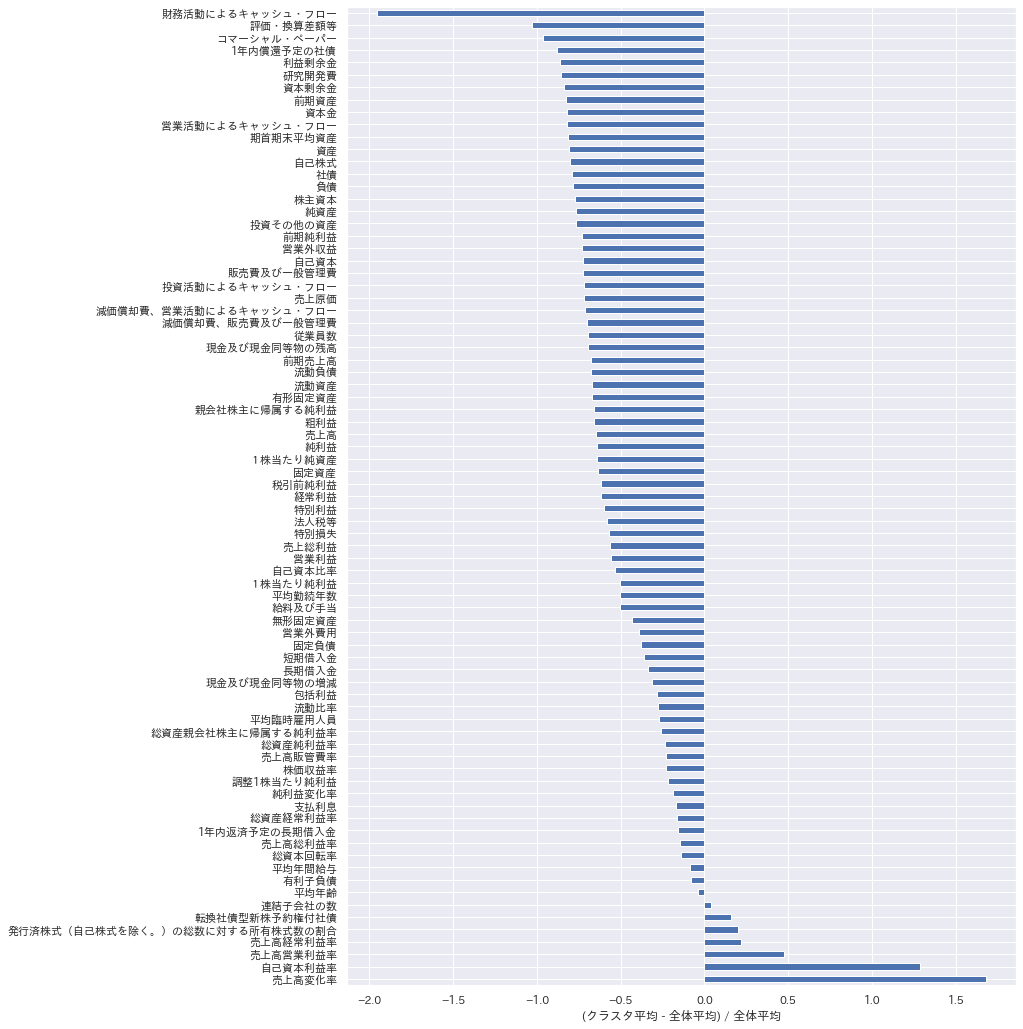

                         会社名      業種
証券コード                               
1407.0          ウエストホールディングス     建設業
1419.0                 タマホーム     建設業
1451.0                   ＫＨＣ     建設業
2138.0                  クルーズ  情報・通信業
2168.0               パソナグループ   サービス業
...                      ...     ...
9519.0                   レノバ  電気・ガス業
9603.0             エイチ・アイ・エス   サービス業
9704.0    アゴーラ・ホスピタリティー・グループ   サービス業
9707.0  ユニマット　リタイアメント・コミュニティ   サービス業
9792.0                 ニチイ学館   サービス業

[105 rows x 2 columns]
103 companies in cluster 0


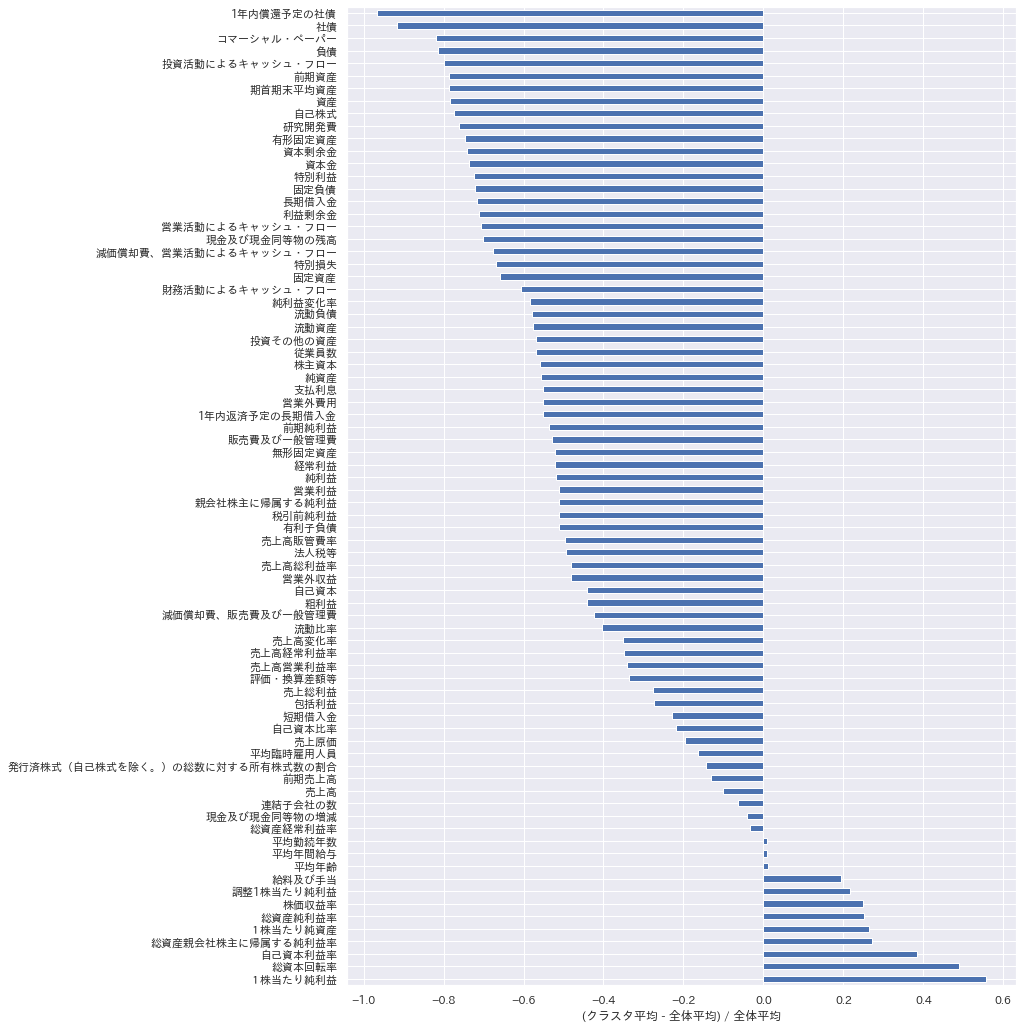

                会社名      業種
証券コード                      
1301.0           極洋  水産・農林業
1718.0         美樹工業     建設業
1719.0         安藤・間     建設業
1798.0         守谷商会     建設業
1909.0    日本ドライケミカル      機械
...             ...     ...
9908.0         日本電計     卸売業
9913.0         日邦産業     卸売業
9956.0  バローホールディングス     小売業
9960.0          東テク     卸売業
9994.0          やまや     小売業

[103 rows x 2 columns]
97 companies in cluster 42


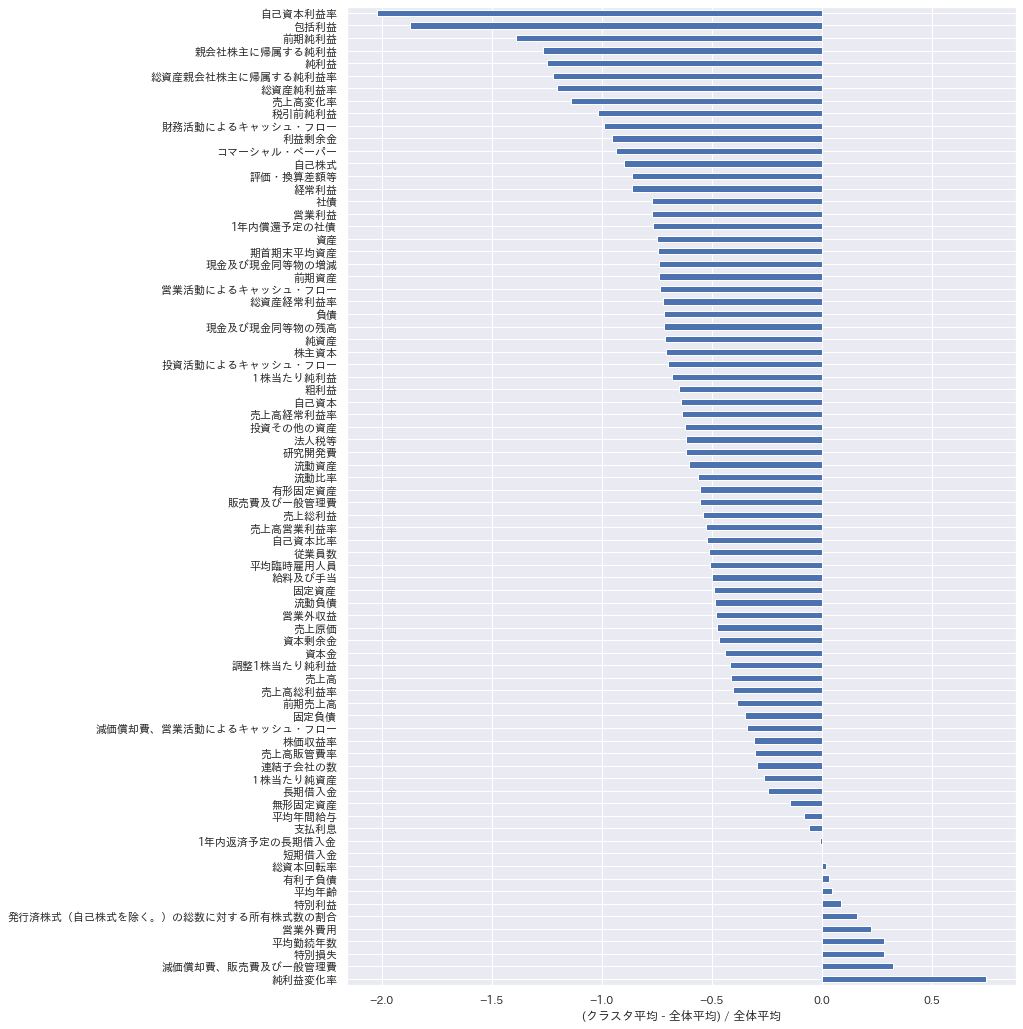

                 会社名      業種
証券コード                       
1380.0          秋川牧園  水産・農林業
1420.0      サンヨーホームズ     建設業
1848.0       富士ピー・エス     建設業
1906.0         細田工務店     建設業
2058.0         ヒガシマル     食料品
...              ...     ...
9647.0     協和コンサルタンツ   サービス業
9812.0  テーオーホールディングス     卸売業
9829.0      ながの東急百貨店     小売業
9896.0    ＪＫホールディングス     卸売業
9946.0        ミニストップ     小売業

[97 rows x 2 columns]
89 companies in cluster 29


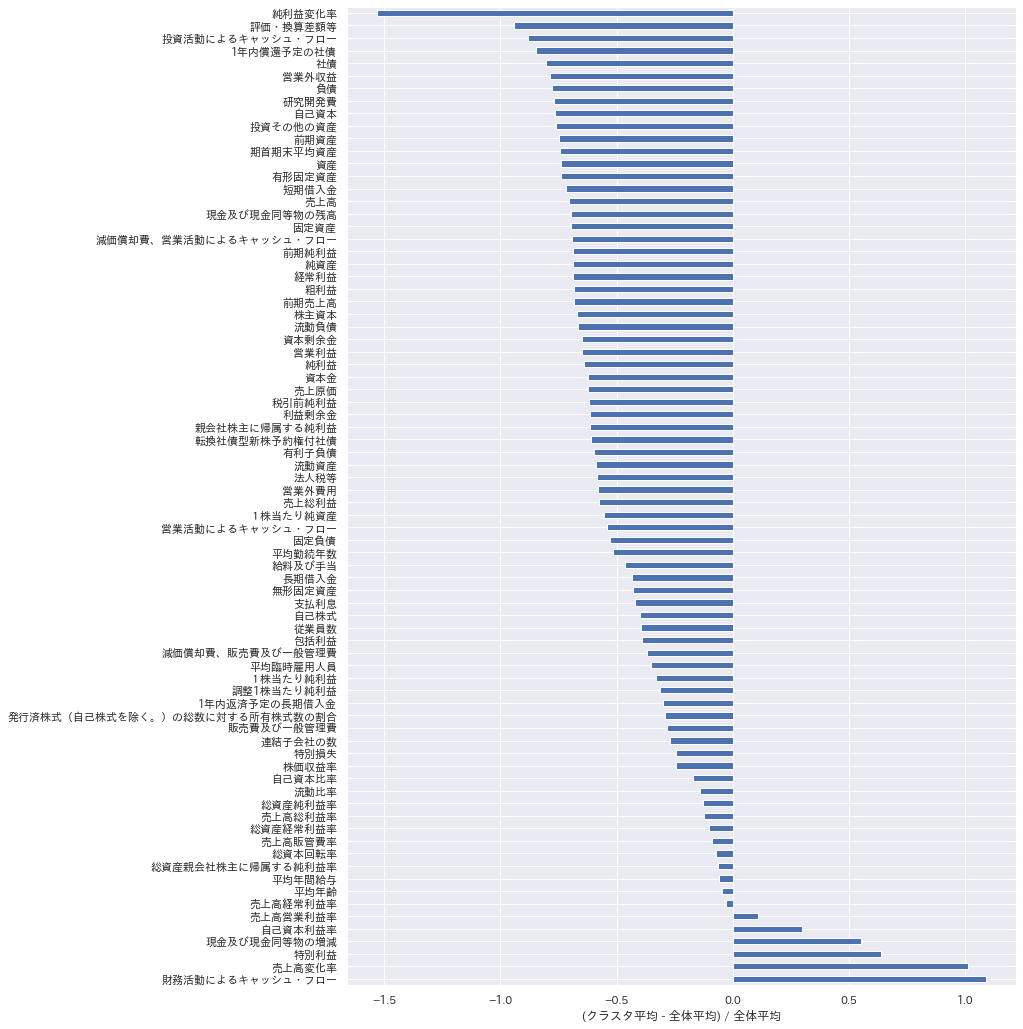

                     会社名      業種
証券コード                           
1383.0            ベルグアース  水産・農林業
1430.0     ファーストコーポレーション     建設業
1433.0              ベステラ     建設業
1448.0  スペースバリューホールディングス     建設業
2158.0           ＦＲＯＮＴＥＯ   サービス業
...                  ...     ...
9425.0            日本テレホン  情報・通信業
9468.0          ＫＡＤＯＫＡＷＡ  情報・通信業
9612.0            ラックランド   サービス業
9616.0          共立メンテナンス   サービス業
9816.0           ストライダーズ     卸売業

[89 rows x 2 columns]
88 companies in cluster 50


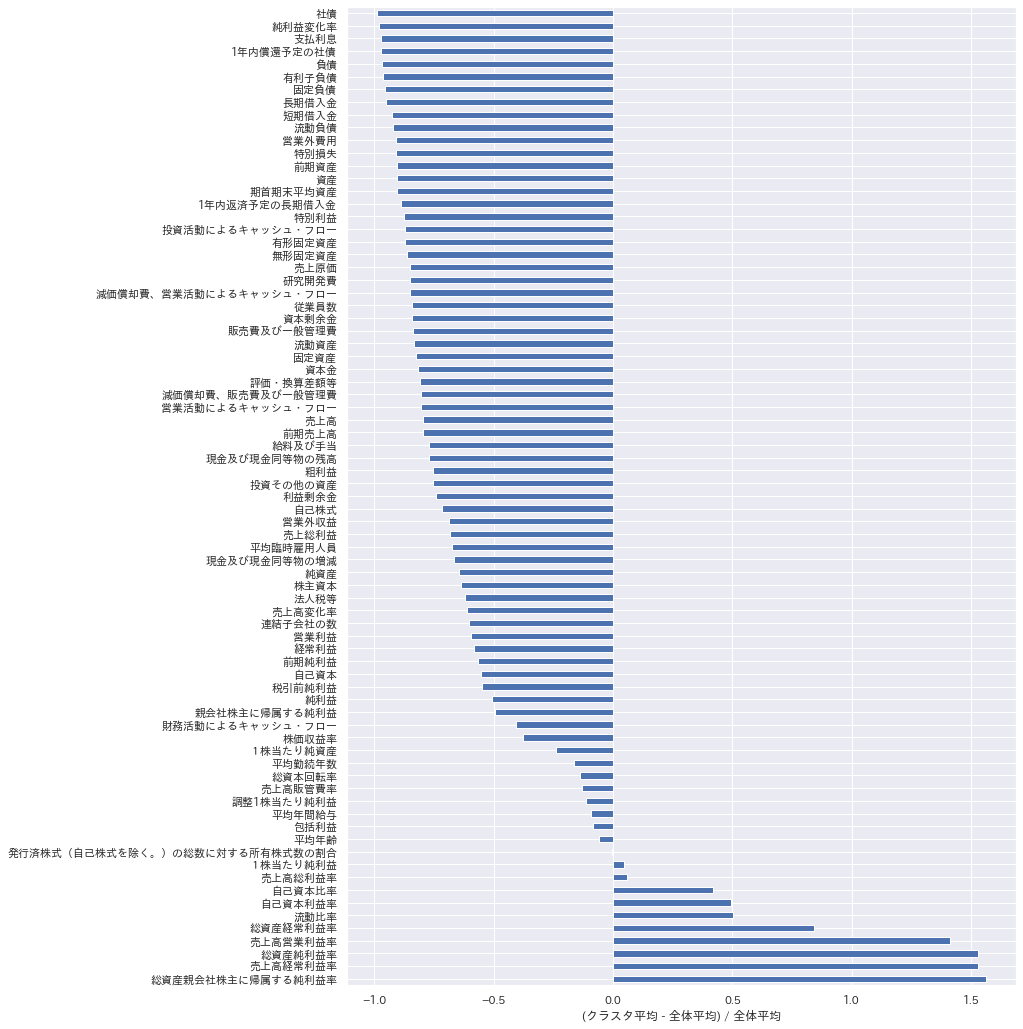

               会社名      業種
証券コード                     
1381.0       アクシーズ  水産・農林業
1716.0    第一カッター興業     建設業
2169.0         ＣＤＳ   サービス業
2311.0         エプコ   サービス業
2376.0      サイネックス   サービス業
...            ...     ...
9759.0         ＮＳＤ  情報・通信業
9793.0        ダイセキ   サービス業
9837.0         モリト     卸売業
9842.0  アークランドサカモト     小売業
9955.0       ヨンキュウ     卸売業

[88 rows x 2 columns]
77 companies in cluster 18


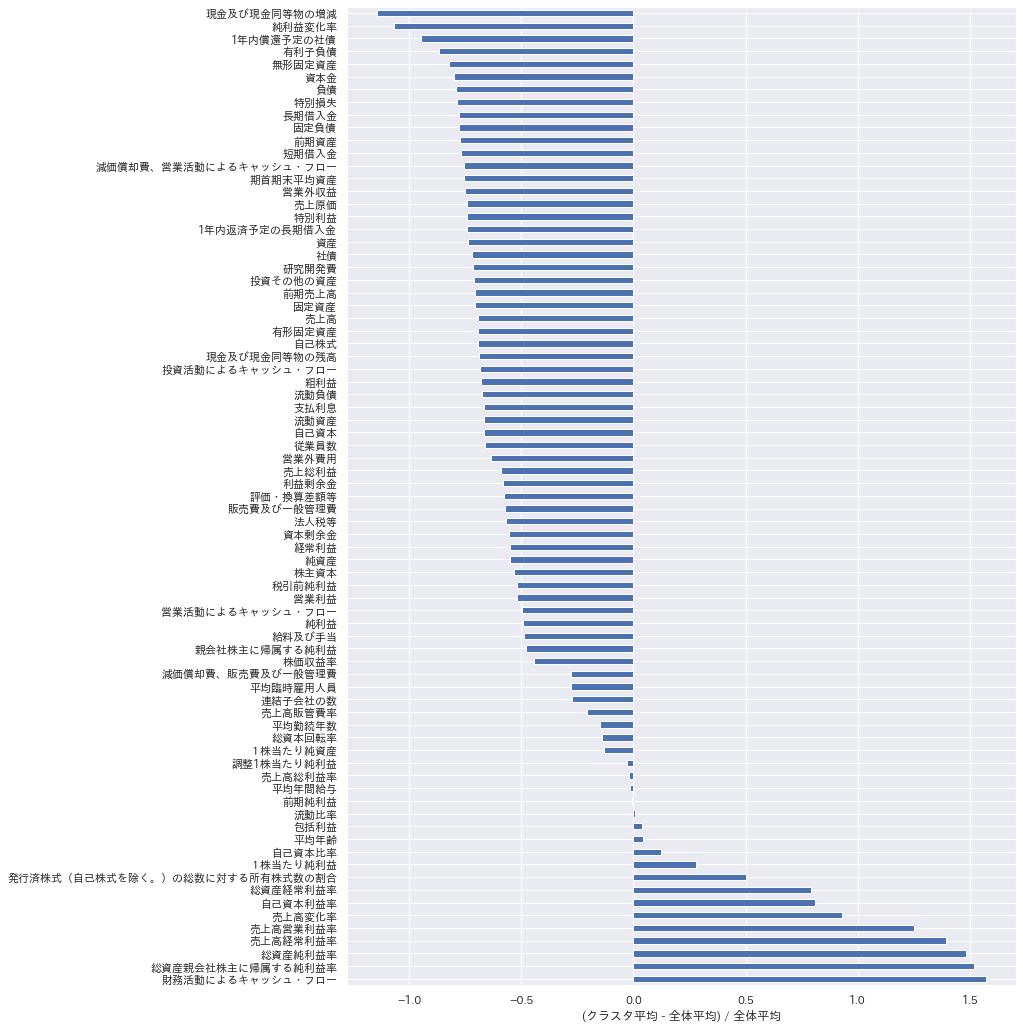

                  会社名     業種
証券コード                       
1450.0         田中建設工業    建設業
1712.0  ダイセキ環境ソリューション    建設業
1730.0     麻生フオームクリート    建設業
1737.0   三井金属エンジニアリング    建設業
1881.0          ＮＩＰＰＯ    建設業
...               ...    ...
9733.0            ナガセ  サービス業
9776.0     札幌臨床検査センター  サービス業
9820.0     エムティジェネックス   不動産業
9964.0         アイ・テック    卸売業
9976.0          セキチュー    小売業

[77 rows x 2 columns]
64 companies in cluster 23


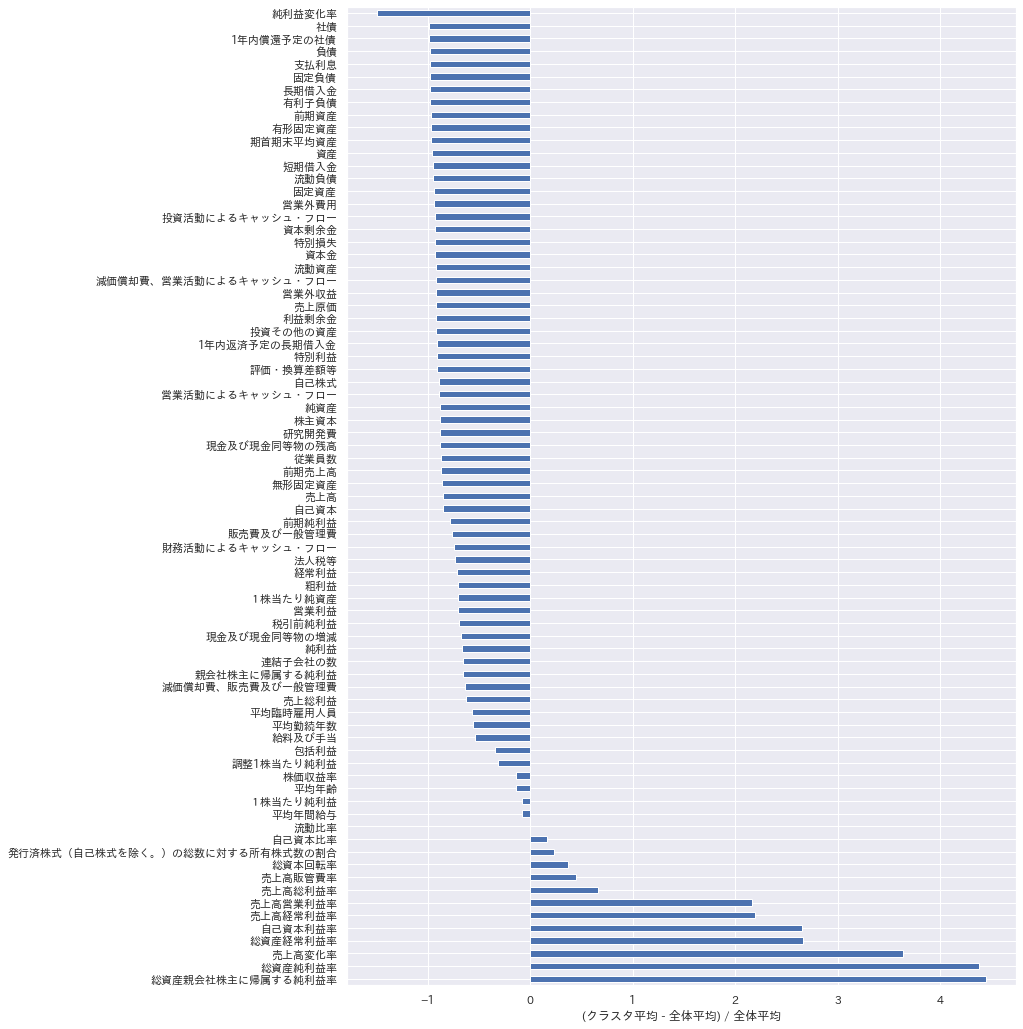

                   会社名      業種
証券コード                         
2198.0        アイ・ケイ・ケイ   サービス業
2410.0    キャリアデザインセンター   サービス業
2412.0       ベネフィット・ワン   サービス業
2436.0         共同ピーアール   サービス業
2454.0         オールアバウト   サービス業
...                ...     ...
9039.0       サカイ引越センター     陸運業
9279.0             ギフト     小売業
9416.0            ビジョン  情報・通信業
9423.0  フォーバル・リアルストレート  情報・通信業
9450.0        ファイバーゲート  情報・通信業

[64 rows x 2 columns]
62 companies in cluster 52


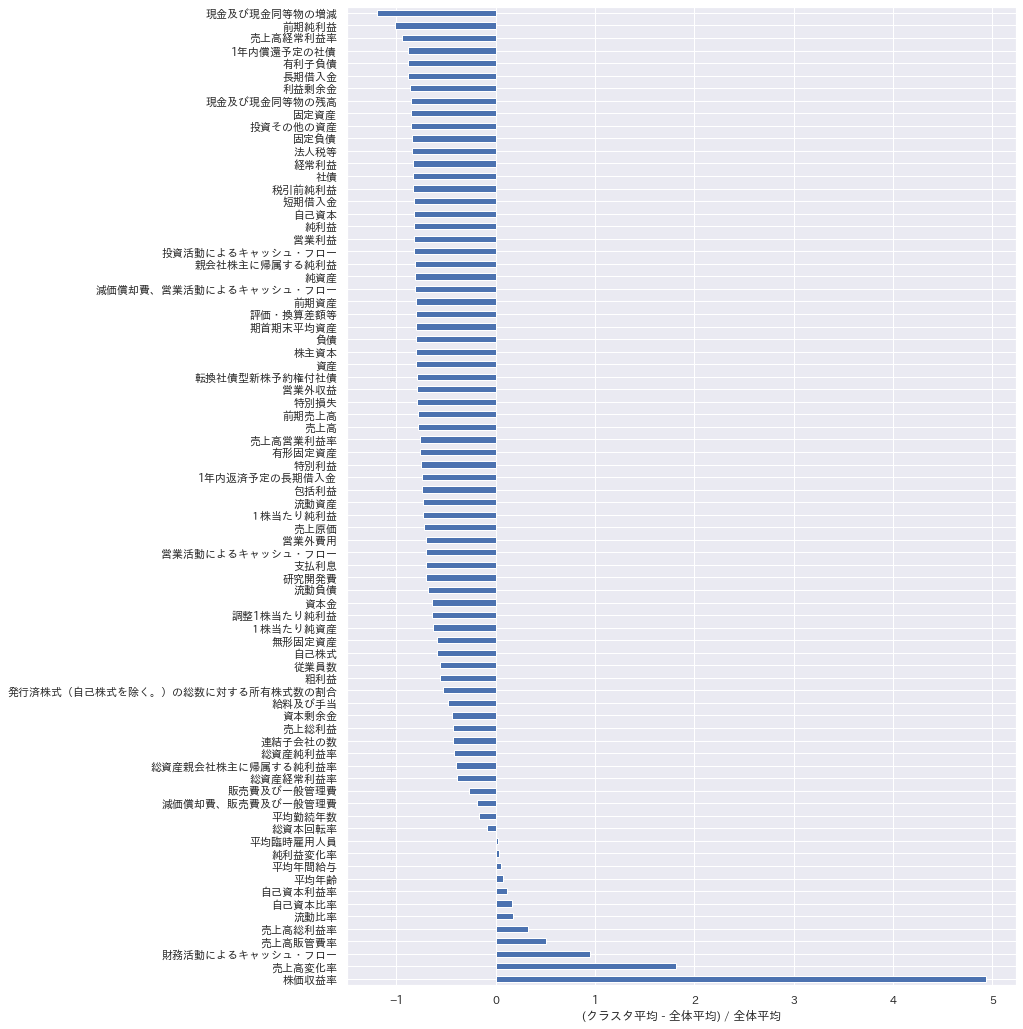

                会社名     業種
証券コード                     
1844.0         大盛工業    建設業
2160.0   ジーエヌアイグループ    医薬品
2294.0         柿安本店    食料品
2342.0    トランスジェニック  サービス業
2370.0       メディネット  サービス業
...             ...    ...
9643.0        中日本興業  サービス業
9664.0          御園座  サービス業
9861.0  吉野家ホールディングス    小売業
9950.0         ハチバン    小売業
9972.0        アルテック    卸売業

[62 rows x 2 columns]
59 companies in cluster 12


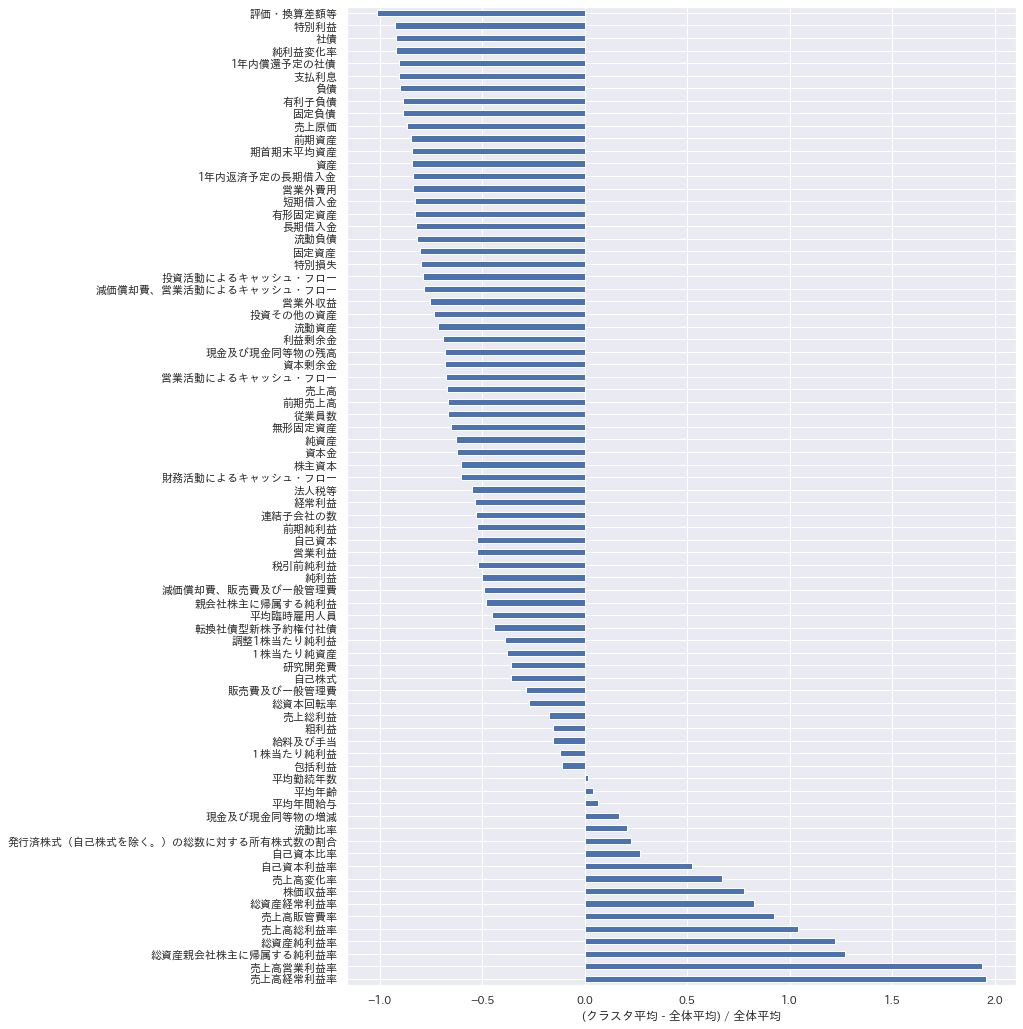

                          会社名      業種
証券コード                                
2222.0                 寿スピリッツ     食料品
2323.0                 ｆｏｎｆｕｎ  情報・通信業
2668.0                    タビオ     卸売業
2673.0                  夢みつけ隊     小売業
2726.0         パルグループホールディングス     小売業
2792.0           ハニーズホールディングス     小売業
3045.0                   カワサキ     卸売業
3688.0         ＣＡＲＴＡ　ＨＯＬＤＩＮＧＳ  情報・通信業
3848.0           データ・アプリケーション  情報・通信業
3964.0                 オークネット  情報・通信業
4312.0             サイバネットシステム  情報・通信業
4345.0                シーティーエス   サービス業
4348.0                 インフォコム  情報・通信業
4552.0                ＪＣＲファーマ     医薬品
4554.0                 富士製薬工業     医薬品
4557.0               医学生物学研究所     医薬品
4653.0                  ダイオーズ   サービス業
4686.0               ジャストシステム  情報・通信業
4734.0                  ビーイング  情報・通信業
4800.0                   オリコン  情報・通信業
4820.0  イーエムシステムズ（商号　ＥＭシステムズ）  情報・通信業
4839.0                  ＷＯＷＯＷ  情報・通信業
4921.0                  ファンケル      化学
4922.0                   コーセー      化学
4928.0      

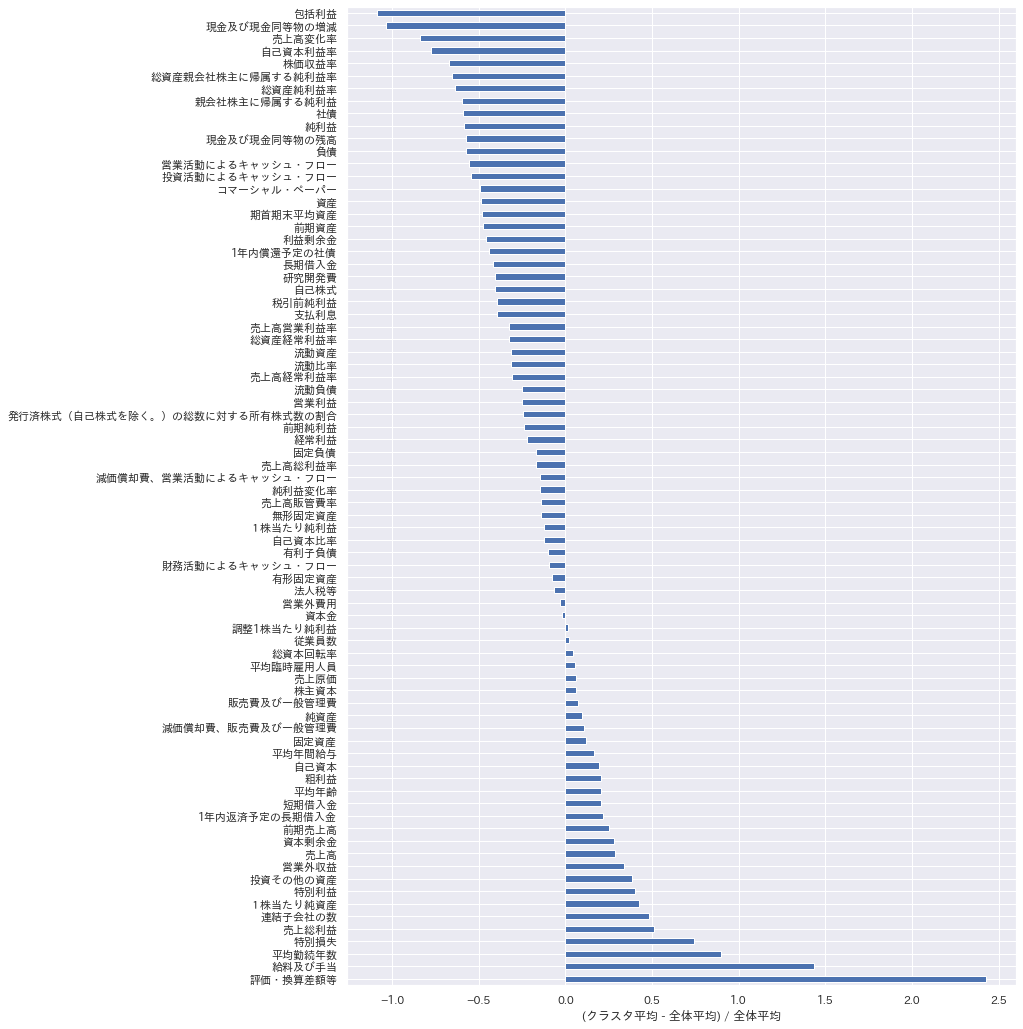

                      会社名        業種
証券コード                              
1443.0         技研ホールディングス       建設業
1720.0               東急建設       建設業
1721.0       コムシスホールディングス       建設業
1826.0               佐田建設       建設業
1867.0                植木組       建設業
2288.0               丸大食品       食料品
2531.0          宝ホールディングス       食料品
2778.0       パレモ・ホールディングス       小売業
3099.0      三越伊勢丹ホールディングス       小売業
3105.0        日清紡ホールディングス      電気機器
3107.0      ダイワボウホールディングス       卸売業
3205.0          ダイドーリミテッド      繊維製品
3417.0    大木ヘルスケアホールディングス       卸売業
3431.0     宮地エンジニアリンググループ      金属製品
3577.0               東海染工      繊維製品
3591.0       ワコールホールディングス      繊維製品
3612.0               ワールド       卸売業
3864.0               三菱製紙     パルプ・紙
4203.0           住友ベークライト        化学
4635.0              東京インキ        化学
4671.0       ファルコホールディングス     サービス業
5103.0         昭和ホールディングス      ゴム製品
5202.0              日本板硝子  ガラス・土石製品
5216.0              倉元製作所  ガラス・土石製品
5288.0     アジアパイルホールディングス  ガラス・土石製品
5602.0              栗本鐵工所   

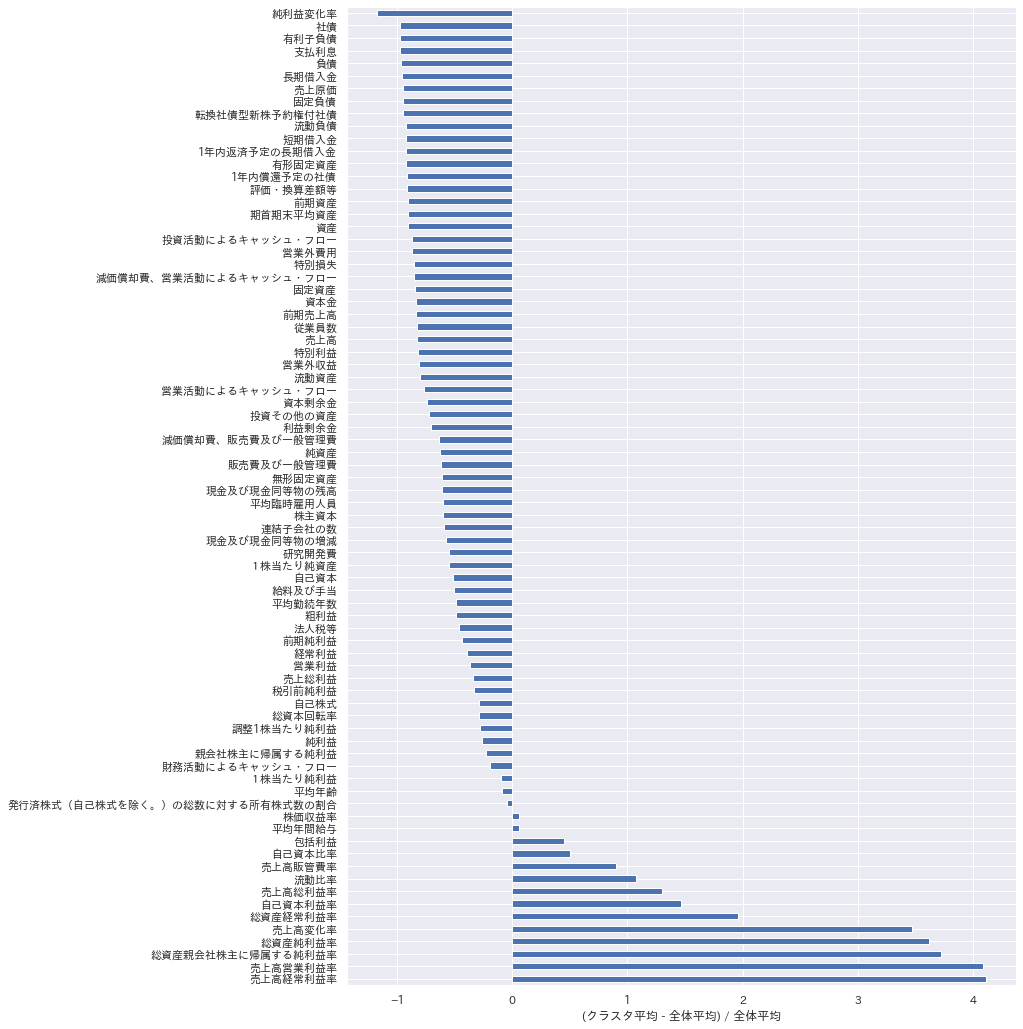

                         会社名      業種
証券コード                               
2121.0                  ミクシィ   サービス業
2124.0       ジェイエイシーリクルートメント   サービス業
2150.0                 ケアネット   サービス業
2326.0               デジタルアーツ  情報・通信業
2341.0             アルバイトタイムス   サービス業
2352.0                  エイジア  情報・通信業
2440.0                  ぐるなび   サービス業
2492.0               インフォマート   サービス業
2674.0         ハードオフコーポレーション     小売業
2753.0                 あみやき亭     小売業
3087.0      ドトール・日レスホールディングス     小売業
3395.0         サンマルクホールディングス     小売業
3646.0                    駅探  情報・通信業
3649.0              ファインデックス  情報・通信業
3653.0                  モルフォ  情報・通信業
3698.0            ＣＲＩ・ミドルウェア  情報・通信業
3765.0  ガンホー・オンライン・エンターテイメント  情報・通信業
3768.0              リスクモンスター  情報・通信業
3773.0           アドバンスト・メディア  情報・通信業
3810.0              サイバーステップ  情報・通信業
3835.0                 ｅＢＡＳＥ  情報・通信業
3851.0             日本一ソフトウェア  情報・通信業
3901.0               マークラインズ  情報・通信業
3902.0        メディカル・データ・ビジョン  情報・通信業
3914.0               ＪＩＧ－ＳＡＷ  情報・通信業
3

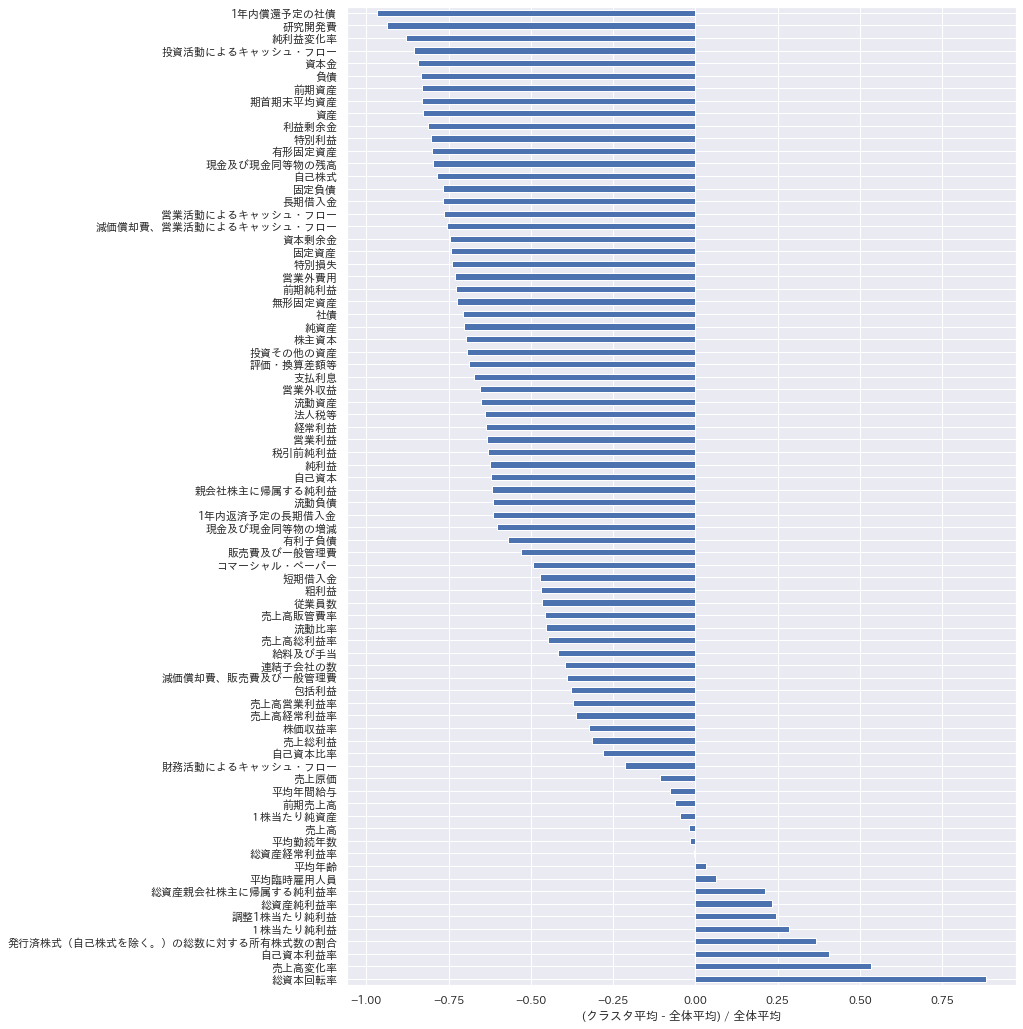

                           会社名       業種
証券コード                                  
1352.0                    ホウスイ      卸売業
2293.0                    滝沢ハム      食料品
2374.0           セントケア・ホールディング    サービス業
2375.0                  ギグワークス    サービス業
2415.0           ヒューマンホールディングス    サービス業
2429.0            ワールドホールディングス    サービス業
2678.0                    アスクル      小売業
2692.0                   伊藤忠食品      卸売業
2714.0                  プラマテルズ      卸売業
2729.0                   ＪＡＬＵＸ      卸売業
2737.0                トーメンデバイス      卸売業
3024.0                   クリエイト      卸売業
3157.0          ジューテックホールディングス      卸売業
3168.0                      黒谷      卸売業
3184.0            ＩＣＤＡホールディングス      小売業
3344.0            ワンダーコーポレーション      小売業
3353.0             メディカル一光グループ      小売業
3480.0               ジェイ・エス・ビー     不動産業
3784.0                   ヴィンクス   情報・通信業
3931.0                 バリューゴルフ   情報・通信業
4337.0                      ぴあ    サービス業
4343.0               イオンファンタジー    サービス業
4433.0  ヒト・コミュニケーションズ・ホールディングス   情報・通信業


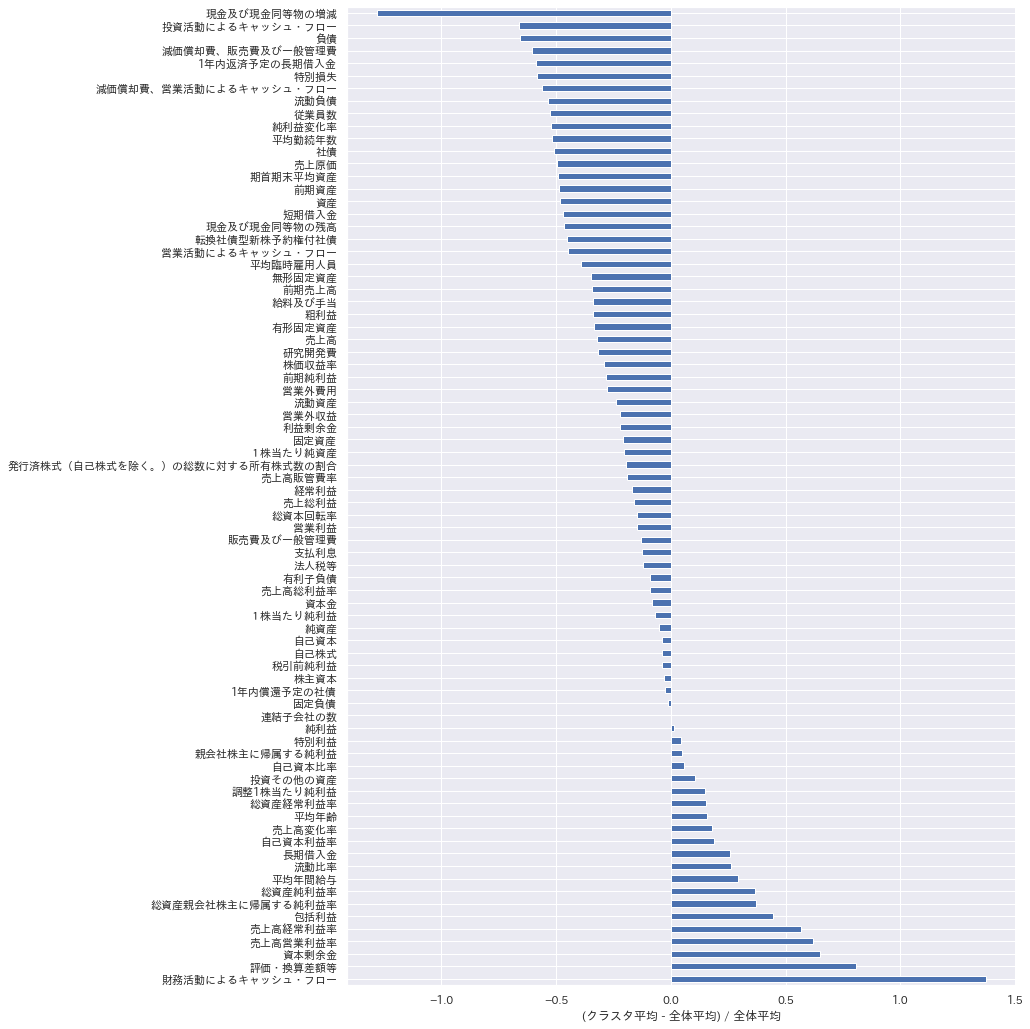

                            会社名        業種
証券コード                                    
1400.0            ルーデン・ホールディングス       建設業
1717.0             明豊ファシリティワークス       建設業
1783.0           アジアゲートホールディングス       建設業
2153.0              Ｅ・Ｊホールディングス     サービス業
2385.0              総医研ホールディングス     サービス業
2405.0                     フジコー     サービス業
2468.0                  フュートレック     サービス業
3098.0                 ココカラファイン       小売業
3151.0      バイタルケーエスケー・ホールディングス       卸売業
3209.0                     カネヨウ       卸売業
3231.0            野村不動産ホールディングス      不動産業
3252.0                   日本商業開発      不動産業
3392.0           デリカフーズホールディングス       卸売業
3543.0              コメダホールディングス       卸売業
3608.0              ＴＳＩホールディングス      繊維製品
3657.0  ポールトゥウィン・ピットクルーホールディングス    情報・通信業
3756.0               豆蔵ホールディングス    情報・通信業
3817.0              ＳＲＡホールディングス    情報・通信業
3913.0                   ｓＭｅｄｉｏ    情報・通信業
3918.0              ＰＣＩホールディングス    情報・通信業
4274.0                     細谷火工        化学
4282.0              ＥＰＳホールディングス   

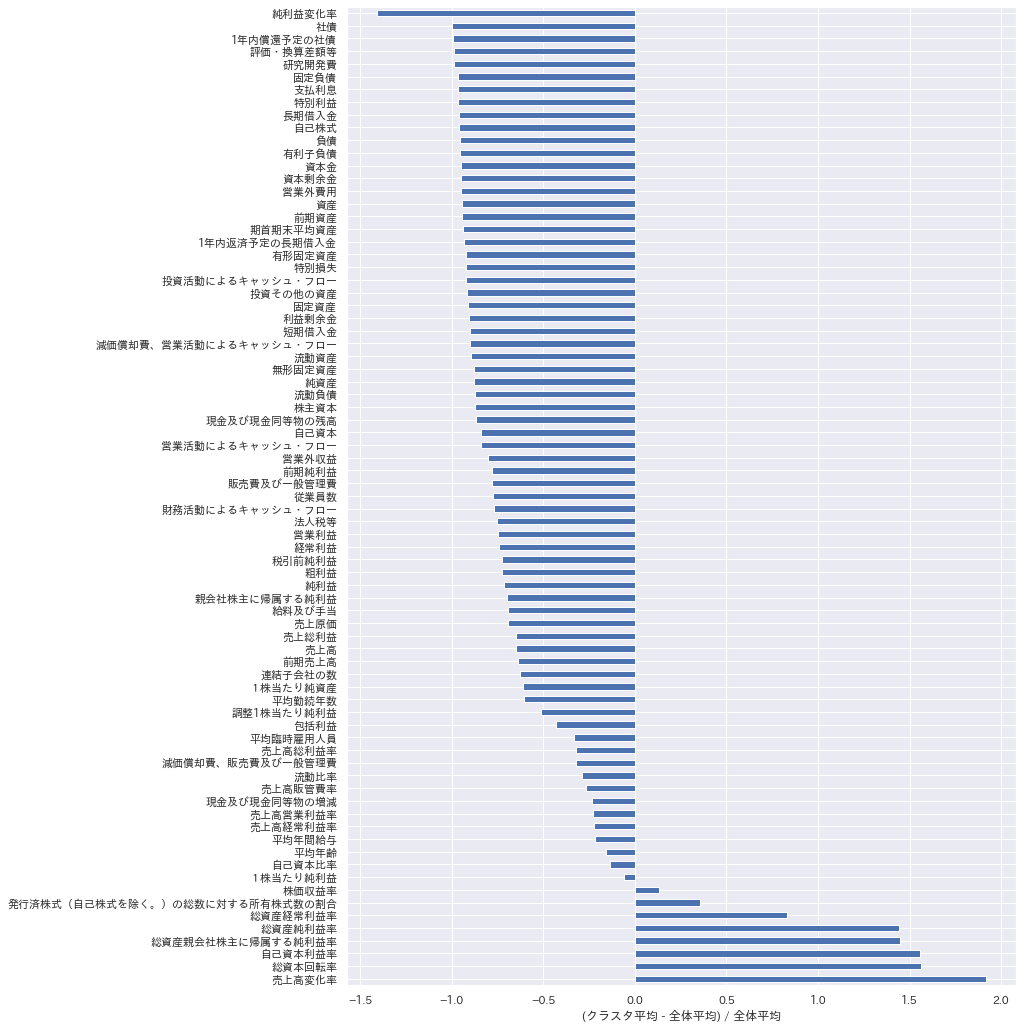

                       会社名       業種
証券コード                              
2122.0            インタースペース    サービス業
2146.0              ＵＴグループ    サービス業
2159.0              フルスピード    サービス業
2172.0               インサイト    サービス業
2173.0                  博展    サービス業
2178.0             トライステージ    サービス業
2425.0              ケアサービス    サービス業
2791.0               大黒天物産      小売業
2798.0     ワイズテーブルコーポレーション      小売業
3020.0               アプライド      小売業
3054.0                ハイパー      卸売業
3135.0       マーケットエンタープライズ    サービス業
3195.0          ジェネレーションパス      小売業
3276.0            日本管理センター     不動産業
3322.0            アルファグループ      卸売業
3349.0              コスモス薬品      小売業
3419.0             アートグリーン      卸売業
3491.0     ＧＡ　ｔｅｃｈｎｏｌｏｇｉｅｓ     不動産業
3538.0      ウイルプラスホールディングス      小売業
3539.0             ジャパンミート      小売業
3738.0              ティーガイア   情報・通信業
4336.0             クリエアナブキ    サービス業
4421.0          ディ・アイ・システム   情報・通信業
4442.0                バルテス   情報・通信業
4781.0            日本ハウズイング    サービス業
4784.0         ＧＭＯアドパートナーズ  

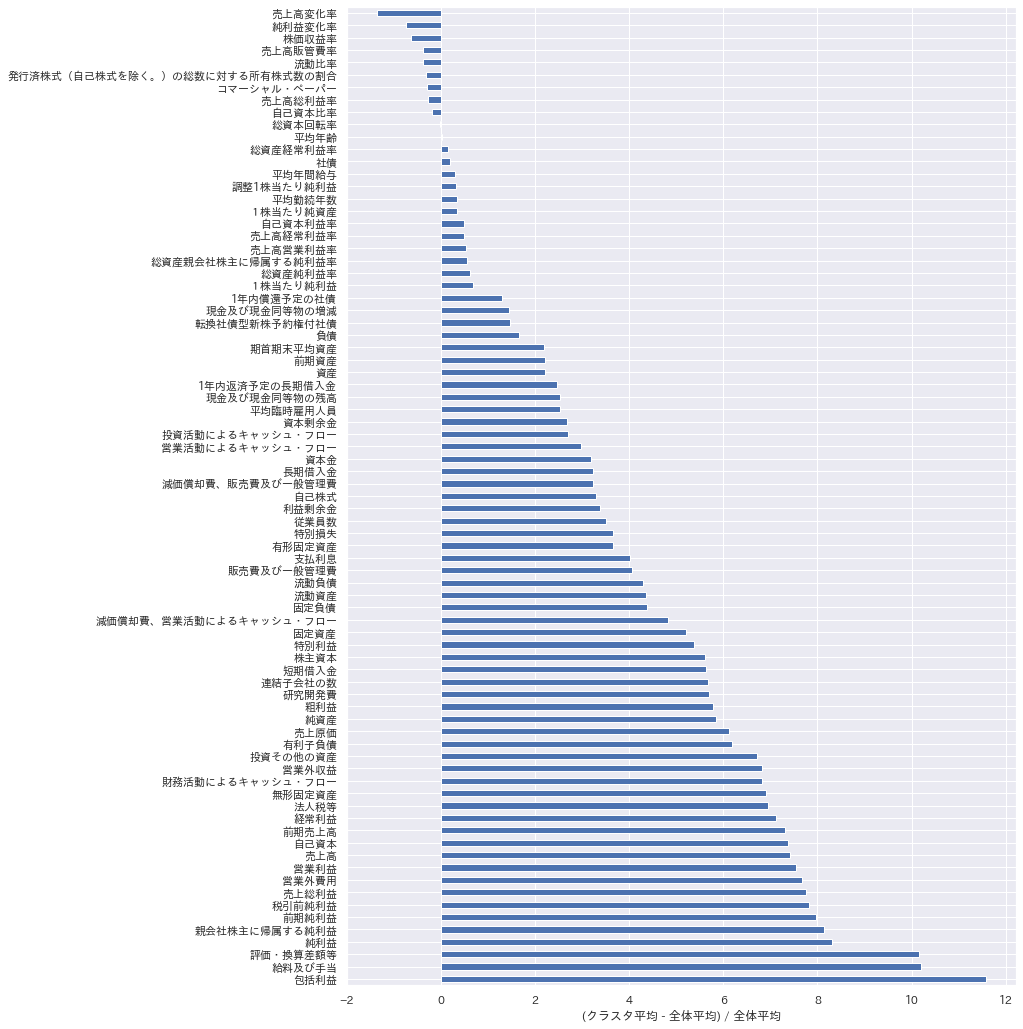

                                会社名        業種
証券コード                                        
1801.0                         大成建設       建設業
1802.0                          大林組       建設業
1808.0                  長谷工コーポレーション       建設業
1812.0                         鹿島建設       建設業
1911.0                         住友林業       建設業
1928.0                        積水ハウス       建設業
2212.0                        山崎製パン       食料品
2269.0                   明治ホールディングス       食料品
2433.0                博報堂ＤＹホールディングス     サービス業
2784.0               アルフレッサホールディングス       卸売業
3401.0                           帝人      繊維製品
3405.0                          クラレ        化学
3861.0                   王子ホールディングス     パルプ・紙
3863.0                         日本製紙     パルプ・紙
3941.0                         レンゴー     パルプ・紙
4004.0                         昭和電工        化学
4042.0                          東ソー        化学
4118.0                          カネカ        化学
4183.0                         三井化学        化学
4204.0                       積水化学工

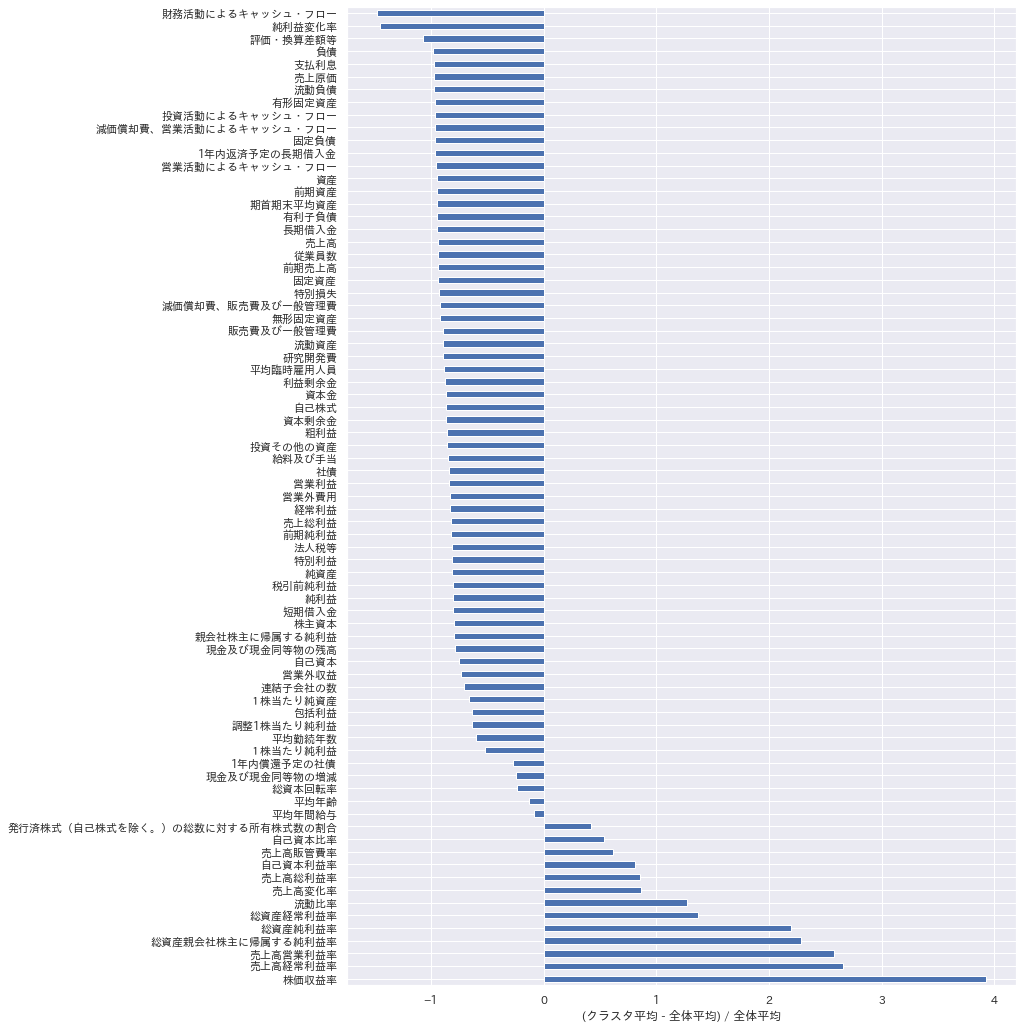

                    会社名      業種
証券コード                          
2449.0         プラップジャパン   サービス業
2480.0      システム・ロケーション   サービス業
2484.0              出前館  情報・通信業
2980.0      ＳＲＥホールディングス    不動産業
3504.0       丸八ホールディングス    繊維製品
3550.0          スタジオアタオ     小売業
3632.0              グリー  情報・通信業
3635.0  コーエーテクモホールディングス  情報・通信業
3694.0            オプティム  情報・通信業
3711.0               創通  情報・通信業
3763.0            プロシップ  情報・通信業
3796.0             いい生活  情報・通信業
3802.0            エコミック  情報・通信業
3921.0           ネオジャパン  情報・通信業
3926.0           オープンドア  情報・通信業
3961.0   シルバーエッグ・テクノロジー  情報・通信業
3963.0         シンクロ・フード  情報・通信業
3983.0               オロ  情報・通信業
4391.0            ロジザード  情報・通信業
4399.0         くふうカンパニー  情報・通信業
4422.0         ＶＡＬＵＥＮＥＸ  情報・通信業
4429.0           リックソフト  情報・通信業
4440.0             ヴィッツ  情報・通信業
4771.0          エフアンドエム   サービス業
4829.0       日本エンタープライズ  情報・通信業
6047.0           Ｇｕｎｏｓｙ   サービス業
6048.0      デザインワン・ジャパン   サービス業
6061.0        ユニバーサル園芸社   サービス業
6184.0             鎌倉新書   サービス業
6535.0  

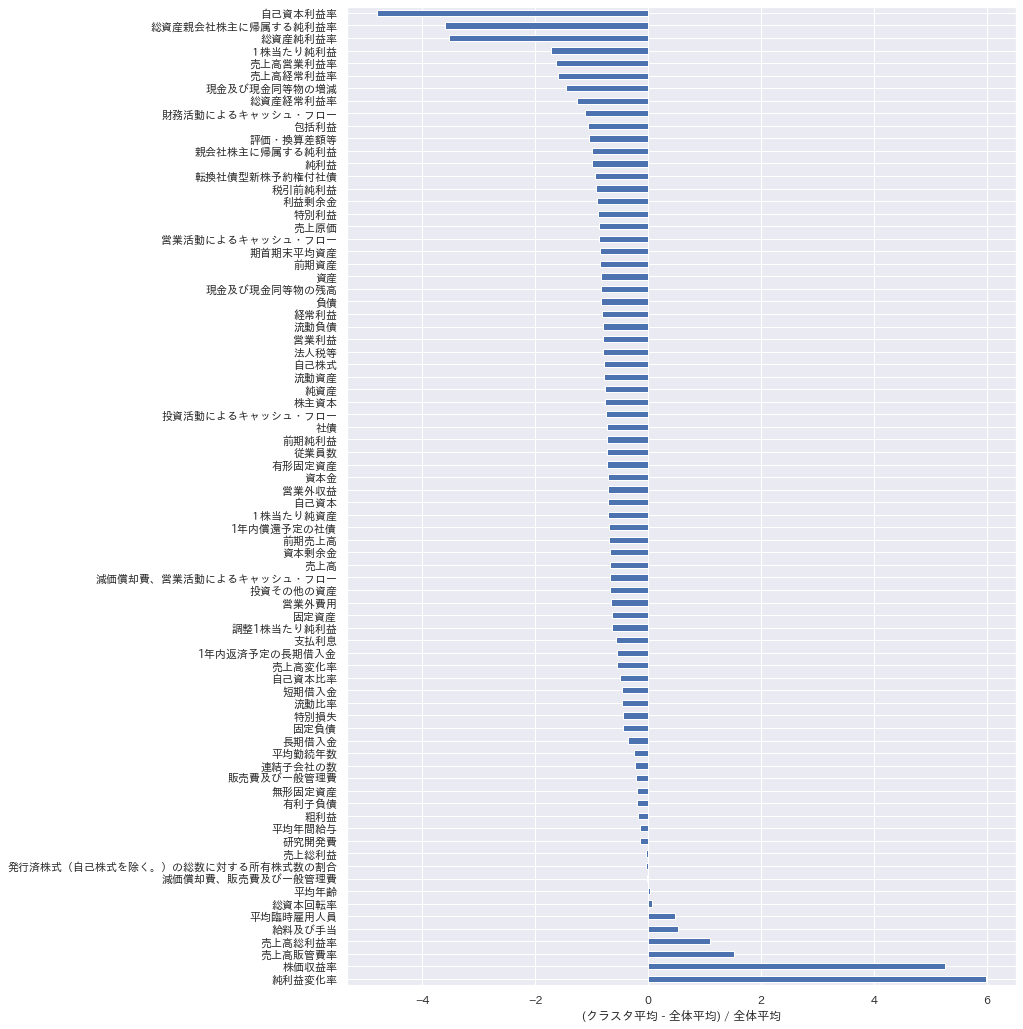

                      会社名     業種
証券コード                           
1757.0        クレアホールディングス    建設業
2402.0                アマナ  サービス業
2499.0       日本和装ホールディングス  サービス業
2694.0            ジー・テイスト    小売業
2736.0     フェスタリアホールディングス    小売業
2752.0         フジオフードシステム    小売業
2789.0                カルラ    小売業
3063.0    ジェイグループホールディングス    小売業
3066.0             ＪＢイレブン    小売業
3068.0                ＷＤＩ    小売業
3073.0         ＤＤホールディングス    小売業
3082.0        きちりホールディングス    小売業
3224.0         ゼネラル・オイスター    小売業
3350.0     レッド・プラネット・ジャパン    卸売業
3372.0                関門海    小売業
3607.0     クラウディアホールディングス   繊維製品
3726.0     フォーシーズホールディングス    小売業
4979.0            ＯＡＴアグリオ     化学
6181.0        パートナーエージェント  サービス業
6190.0          フェニックスバイオ  サービス業
6638.0        ミマキエンジニアリング   電気機器
6659.0           メディアリンクス   電気機器
6736.0               サン電子   電気機器
6786.0                ＲＶＨ   電気機器
6835.0   アライドテレシスホールディングス   電気機器
7412.0                アトム    小売業
7421.0          カッパ・クリエイト    小売業
7522.0                ワタミ    小売業
7550.0    

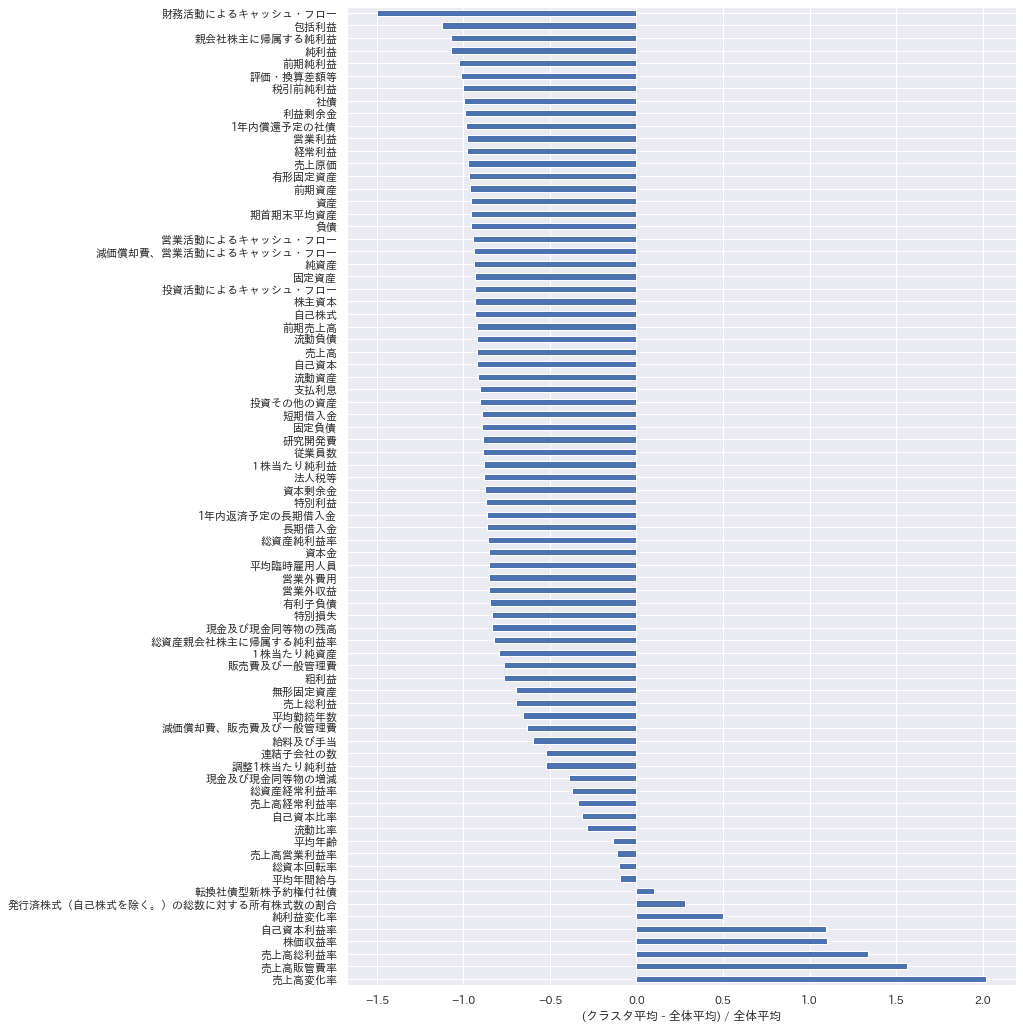

                          会社名      業種
証券コード                                
2175.0               エス・エム・エス   サービス業
2196.0                   エスクリ   サービス業
3010.0                   価値開発   サービス業
3031.0           ラクーンホールディングス     卸売業
3046.0            ジンズホールディングス     小売業
3136.0                   エコノス     小売業
3175.0             エー・ピーカンパニー     小売業
3416.0                   ピクスタ     小売業
3418.0                 バルニバービ   サービス業
3561.0            力の源ホールディングス     小売業
3689.0                   イグニス  情報・通信業
3690.0                  イルグルム   サービス業
3750.0               ＦＲＡＣＴＡＬＥ  情報・通信業
3815.0                 メディア工房  情報・通信業
3962.0                   チェンジ  情報・通信業
3966.0                 ユーザベース  情報・通信業
3976.0                   シャノン  情報・通信業
4381.0                 ビープラッツ  情報・通信業
4385.0                   メルカリ  情報・通信業
4387.0                    ＺＵＵ   サービス業
4397.0               チームスピリット  情報・通信業
4425.0                  Ｋｕｄａｎ  情報・通信業
4443.0                 Ｓａｎｓａｎ  情報・通信業
4475.0                 ＨＥＮＮＧＥ  情報・通信業
4477.0      

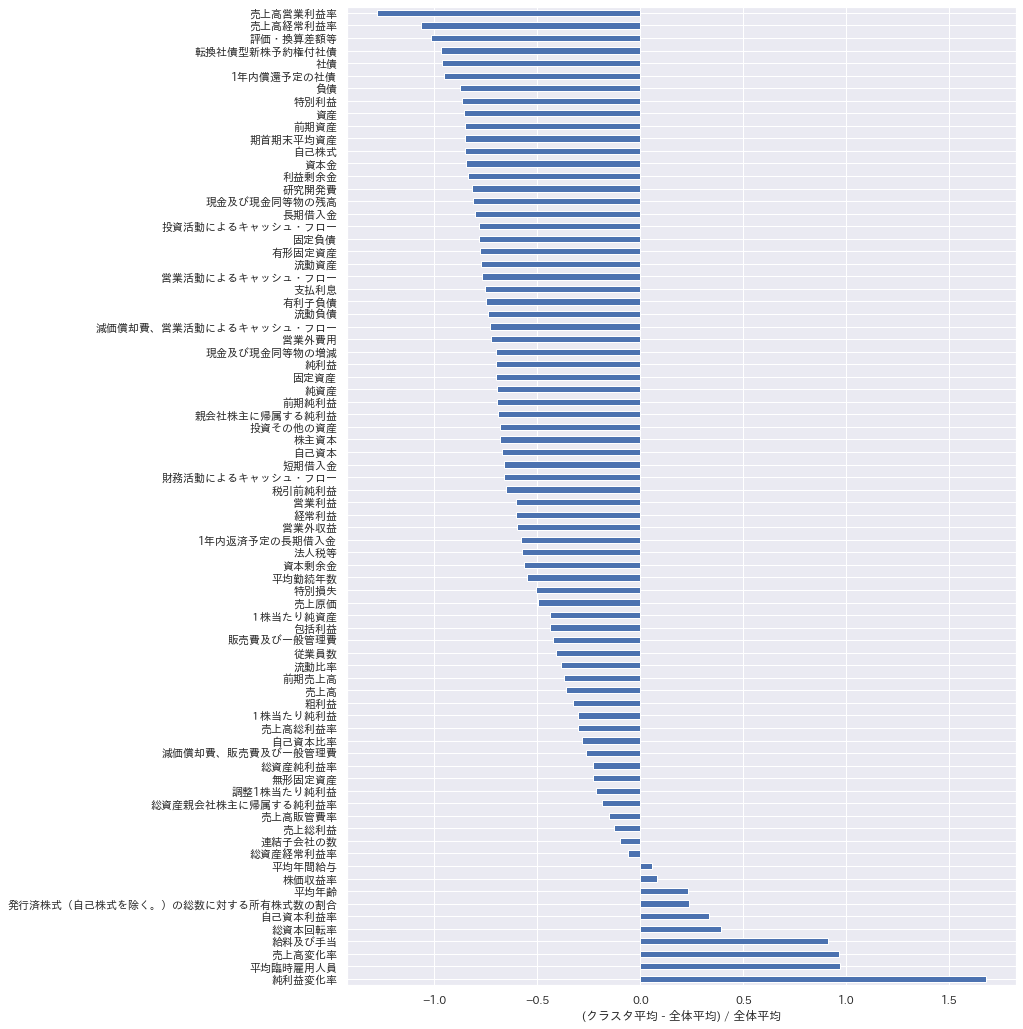

                              会社名      業種
証券コード                                    
1418.0            インターライフホールディングス     建設業
1726.0              ビーアールホールディングス     建設業
2137.0                  光ハイツ・ヴェラス   サービス業
2154.0                 ビーネックスグループ   サービス業
2157.0               コシダカホールディングス   サービス業
2162.0                ｎｍｓホールディングス   サービス業
2304.0                ＣＳＳホールディングス   サービス業
2373.0                       ケア２１   サービス業
2384.0                ＳＢＳホールディングス     陸運業
2796.0            ファーマライズホールディングス   サービス業
2976.0                     日本グランデ    不動産業
3034.0               クオールホールディングス     小売業
3141.0              ウエルシアホールディングス     小売業
3159.0              丸善ＣＨＩホールディングス     小売業
3166.0               ＯＣＨＩホールディングス     卸売業
3222.0  ユナイテッド・スーパーマーケット・ホールディングス     小売業
3803.0                   イメージ情報開発  情報・通信業
3842.0                    ネクストジェン  情報・通信業
4380.0                       Ｍマート  情報・通信業
4584.0                ジーンテクノサイエンス     医薬品
4598.0           ＤｅｌｔａーＦｌｙ　Ｐｈａｒｍａ     医薬品
4690.0                  日本パレットプール 

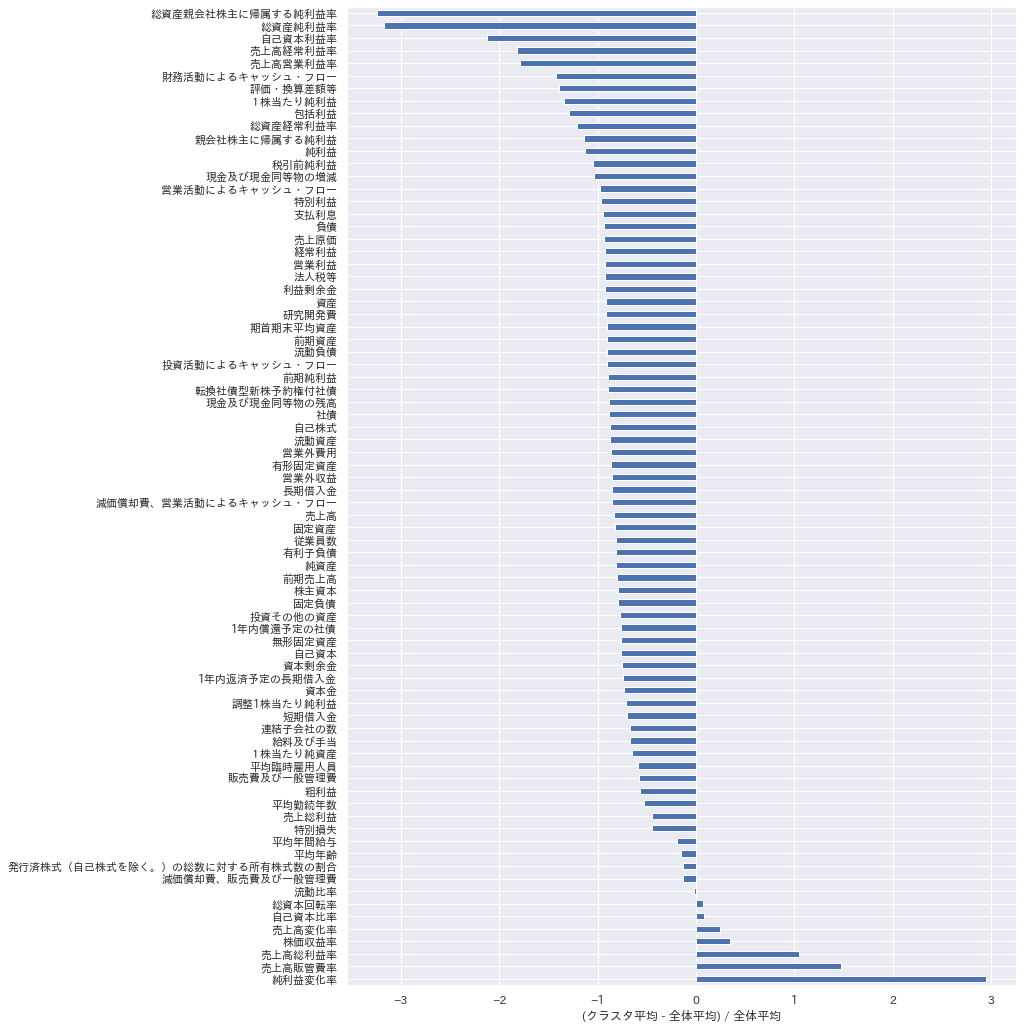

                         会社名      業種
証券コード                               
2722.0                  アイケイ     小売業
2764.0                  ひらまつ     小売業
2818.0                  ピエトロ     食料品
2929.0               ファーマフーズ     食料品
3097.0            物語コーポレーション     小売業
3178.0                  チムニー     小売業
3189.0                  ＡＮＡＰ     小売業
3196.0                ホットランド     小売業
3376.0                  オンリー     小売業
3558.0                  ロコンド     小売業
3639.0                 ボルテージ  情報・通信業
3662.0                 エイチーム  情報・通信業
3760.0                   ケイブ  情報・通信業
3775.0                ガイアックス  情報・通信業
3909.0                ショーケース   サービス業
3920.0                アイビーシー  情報・通信業
3935.0                  エディア  情報・通信業
3979.0                   うるる  情報・通信業
3994.0              マネーフォワード  情報・通信業
4331.0          テイクアンドギヴ・ニーズ   サービス業
4344.0               ソースネクスト  情報・通信業
4478.0                   フリー  情報・通信業
4480.0                  メドレー  情報・通信業
4681.0              リゾートトラスト   サービス業
4764.0    ＳＡＭＵＲＡＩ＆Ｊ　ＰＡＲＴＮＥＲＳ  情報・通信業
4

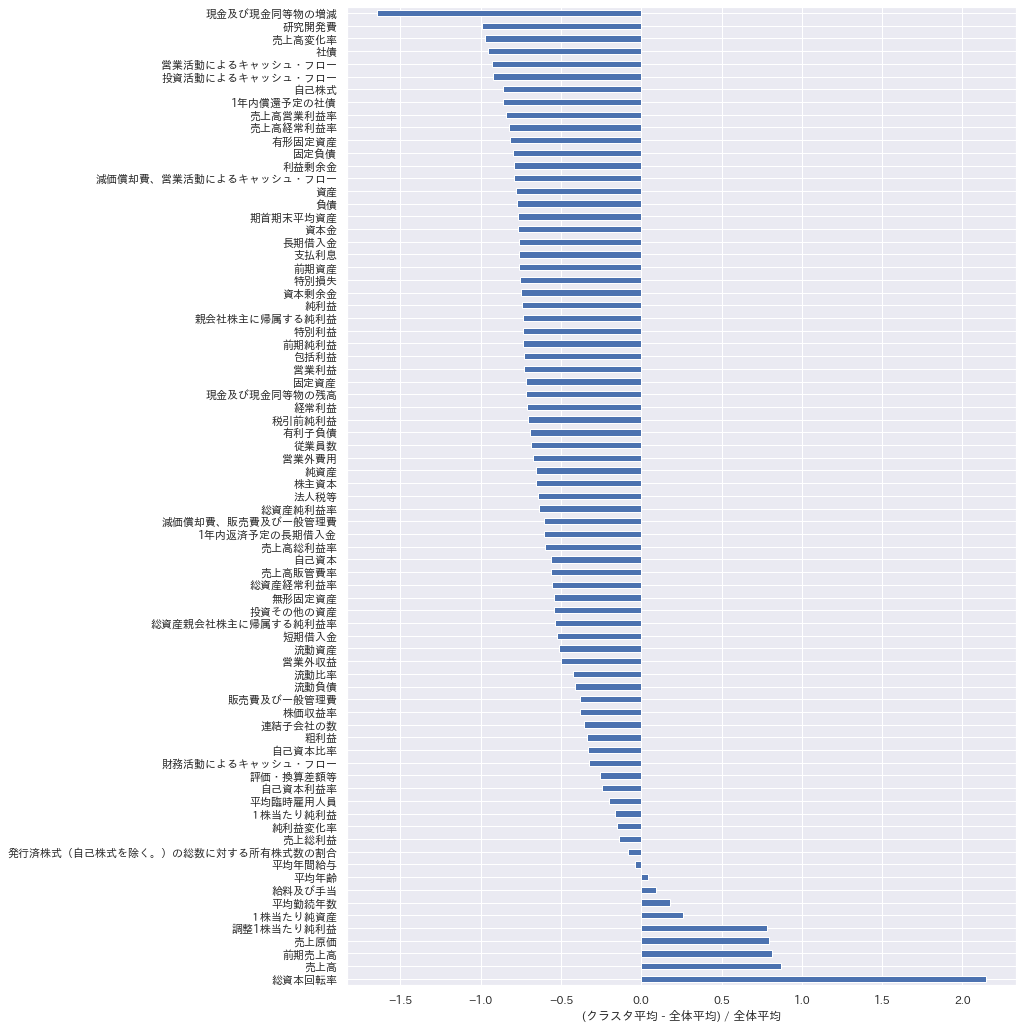

                      会社名      業種
証券コード                            
1382.0                ホーブ  水産・農林業
1491.0               中外鉱業    非鉄金属
2683.0                 魚喜     小売業
2689.0       カワニシホールディングス     卸売業
2700.0               木徳神糧     卸売業
2708.0                 久世     卸売業
2733.0                あらた     卸売業
3071.0              ストリーム     小売業
3096.0          オーシャンシステム     小売業
3143.0              オーウイル     卸売業
3154.0      メディアスホールディングス     卸売業
3160.0                 大光     卸売業
4837.0              シダックス   サービス業
5009.0               富士興産     卸売業
7427.0         エコートレーディング     卸売業
7451.0               三菱食品     卸売業
7520.0                エコス     小売業
7538.0                 大水     卸売業
8030.0               中央魚類     卸売業
8039.0              築地魚市場     卸売業
8041.0        ＯＵＧホールディングス     卸売業
8043.0              スターゼン     卸売業
8044.0               大都魚類     卸売業
8045.0               横浜丸魚     卸売業
8075.0               神鋼商事     卸売業
8097.0               三愛石油     卸売業
8108.0              ヤマエ久野     卸売業
8142.0        

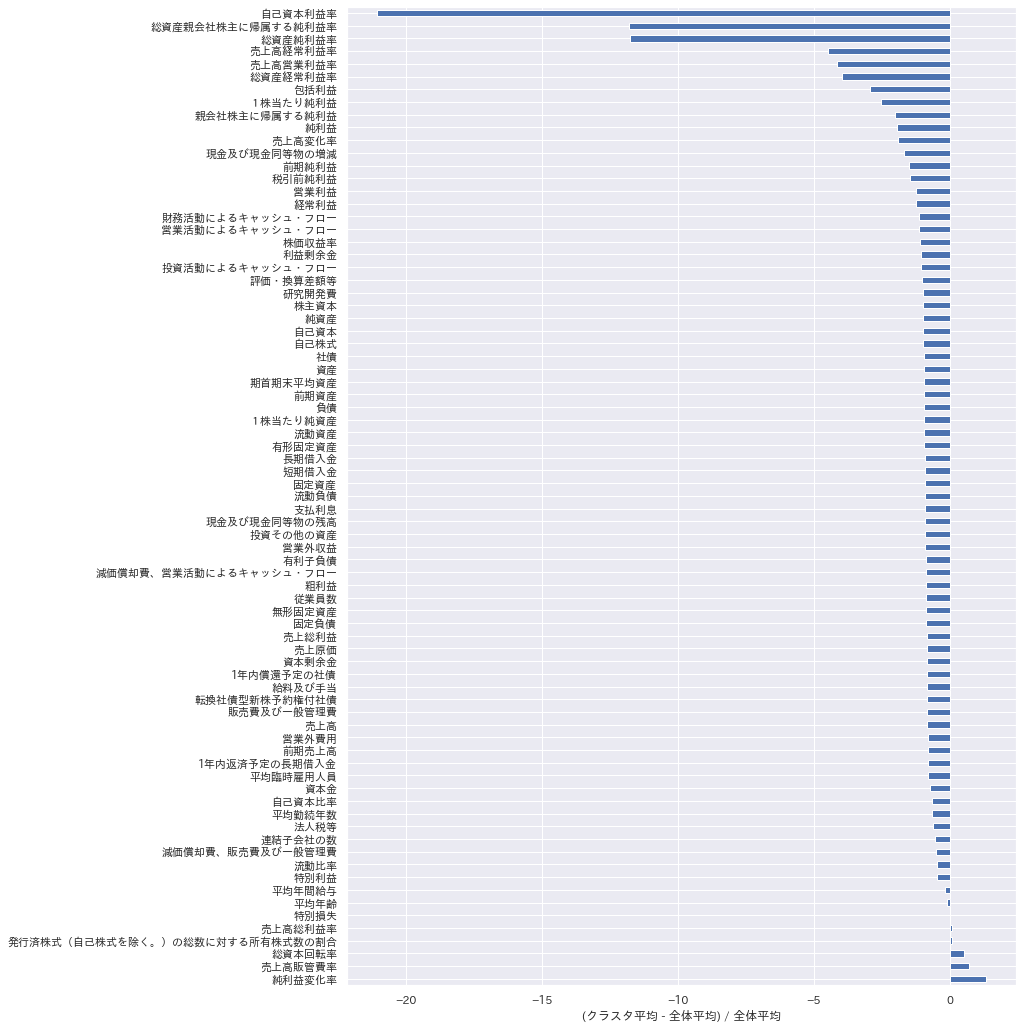

                     会社名      業種
証券コード                           
1711.0       省電舎ホールディングス     建設業
2164.0             地域新聞社   サービス業
2404.0             鉄人化計画   サービス業
2721.0       ジェイホールディングス     卸売業
3041.0           ビューティ花壇     卸売業
3053.0       ペッパーフードサービス     小売業
3070.0              アマガサ     卸売業
3237.0            イントランス    不動産業
3390.0             ＩＮＥＳＴ     卸売業
3664.0    モブキャストホールディングス  情報・通信業
3807.0              フィスコ  情報・通信業
3808.0          オウケイウェイヴ  情報・通信業
3845.0        アイフリークモバイル  情報・通信業
3928.0             マイネット  情報・通信業
3936.0          グローバルウェイ  情報・通信業
6067.0     インパクトホールディングス   サービス業
6094.0  フリークアウト・ホールディングス   サービス業
6547.0             グリーンズ   サービス業
6550.0          Ｆｒｉｎｇｅ８１   サービス業
6634.0           ネクスグループ    電気機器
7063.0             エードット   サービス業
7829.0  サマンサタバサジャパンリミテッド   その他製品
8848.0           レオパレス２１    不動産業
21 companies in cluster 49


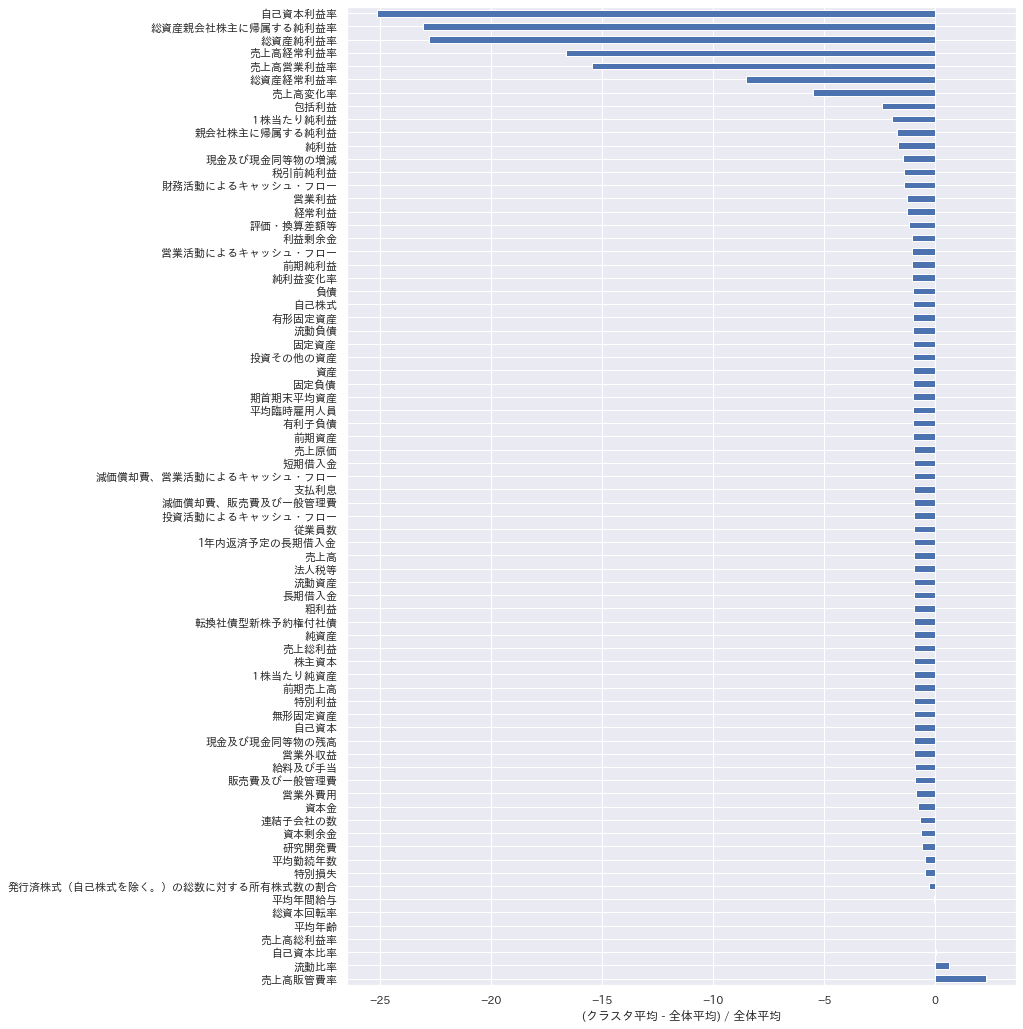

                                                      会社名      業種
証券コード                                                            
1435.0                                             ＴＡＴＥＲＵ     建設業
2134.0                                      燦キャピタルマネージメント   サービス業
2321.0                                    ソフトフロントホールディングス  情報・通信業
2467.0                                        バルクホールディングス   サービス業
2776.0                                         新都ホールディングス     卸売業
2931.0                                              ユーグレナ     食料品
3624.0                                            アクセルマーク  情報・通信業
3672.0                                             オルトプラス  情報・通信業
3747.0                                           インタートレード  情報・通信業
3777.0                                        ＦＨＴホールディングス  情報・通信業
3823.0                                             アクロディア  情報・通信業
3840.0                                                 パス  情報・通信業
4592.0                                              サンバイオ     医薬品
4777.0    

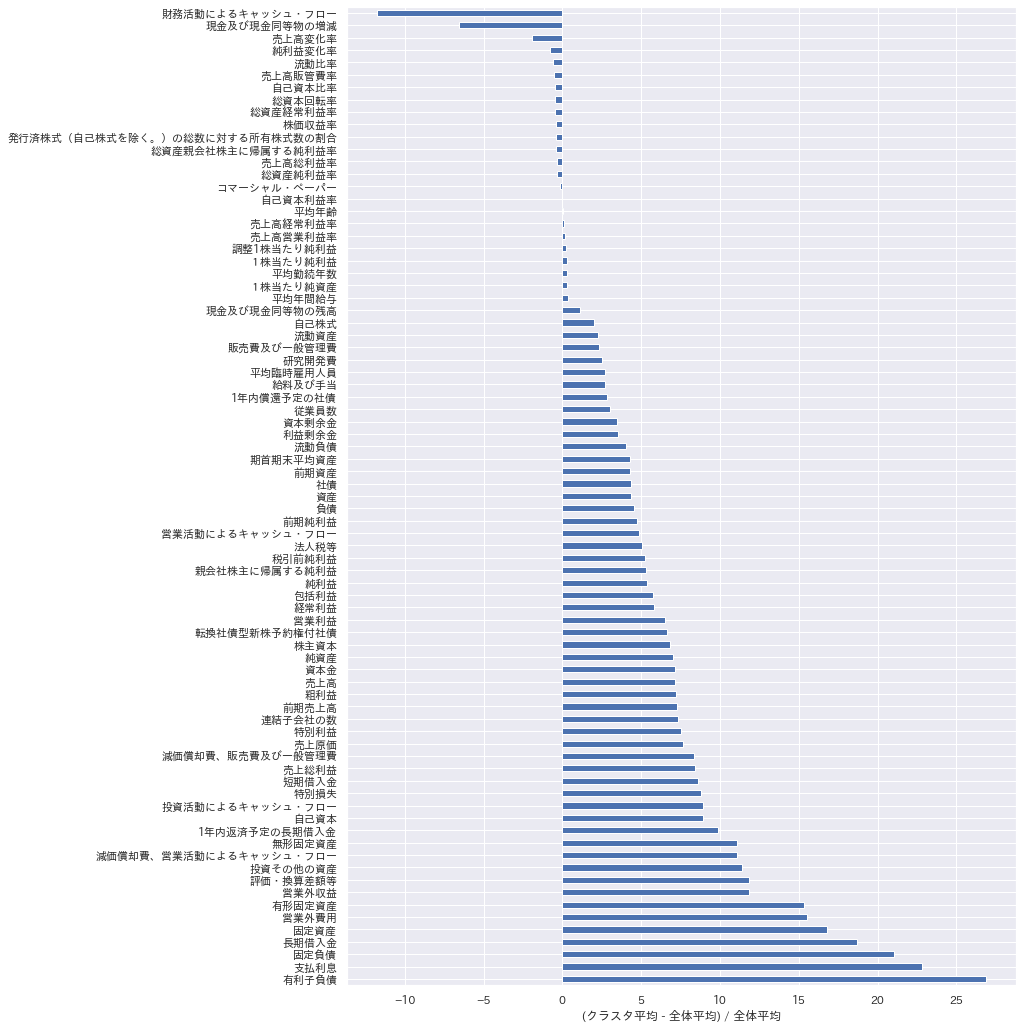

                   会社名      業種
証券コード                         
3003.0          ヒューリック    不動産業
3289.0   東急不動産ホールディングス    不動産業
5406.0           神戸製鋼所      鉄鋼
8804.0            東京建物    不動産業
9001.0            東武鉄道     陸運業
9005.0              東急     陸運業
9021.0         西日本旅客鉄道     陸運業
9024.0      西武ホールディングス     陸運業
9041.0  近鉄グループホールディングス     陸運業
9042.0    阪急阪神ホールディングス     陸運業
9101.0            日本郵船     海運業
9104.0            商船三井     海運業
9107.0            川崎汽船     海運業
9202.0     ＡＮＡホールディングス     空運業
9505.0            北陸電力  電気・ガス業
9509.0           北海道電力  電気・ガス業
9513.0            電源開発  電気・ガス業
9531.0            東京瓦斯  電気・ガス業
9532.0            大阪瓦斯  電気・ガス業
17 companies in cluster 31


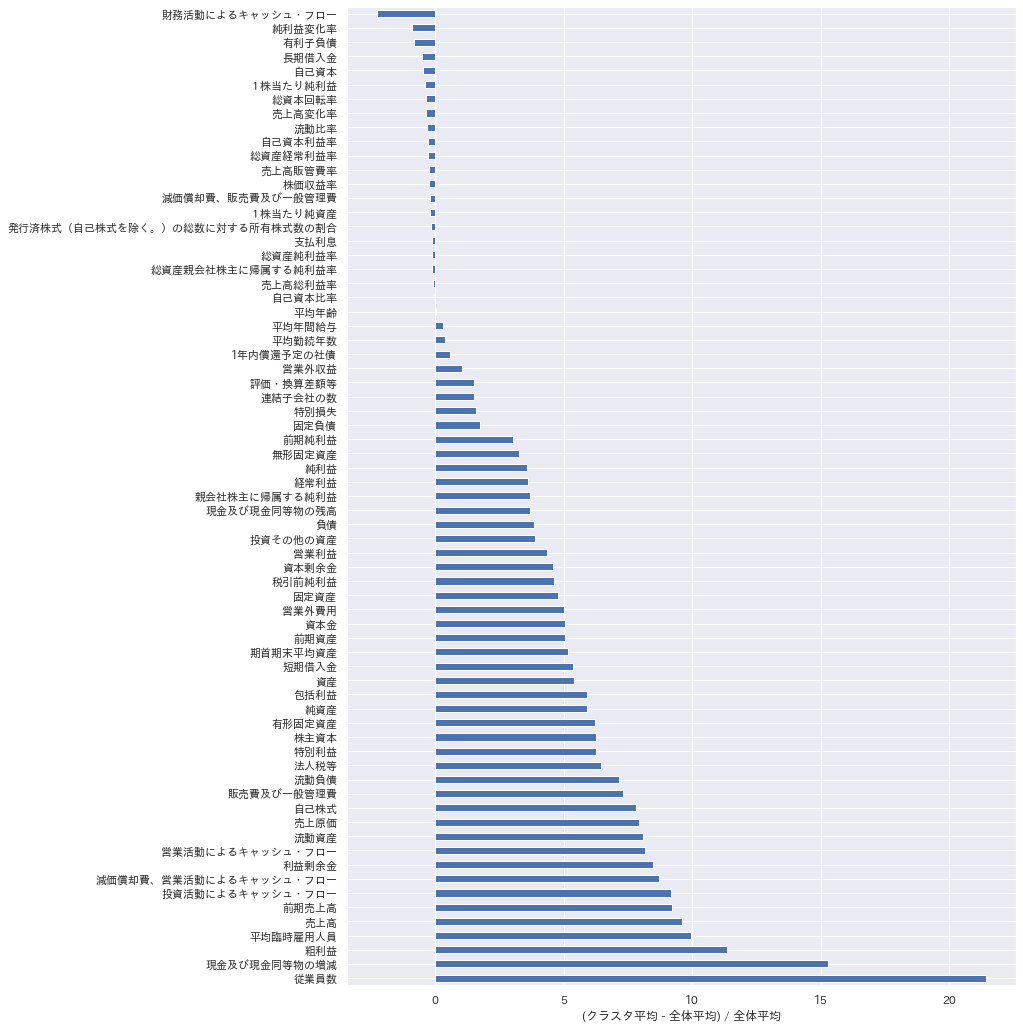

                 会社名        業種
証券コード                         
4452.0            花王        化学
5201.0           ＡＧＣ  ガラス・土石製品
6201.0        豊田自動織機     輸送用機器
6326.0           クボタ        機械
6479.0       ミネベアミツミ      電気機器
6502.0            東芝      電気機器
6594.0          日本電産      電気機器
6724.0      セイコーエプソン      電気機器
6758.0           ソニー      電気機器
6762.0           ＴＤＫ      電気機器
6971.0           京セラ      電気機器
7203.0        トヨタ自動車     輸送用機器
7259.0        アイシン精機     輸送用機器
7751.0          キヤノン      電気機器
7752.0           リコー      電気機器
9064.0   ヤマトホールディングス       陸運業
9613.0  エヌ・ティ・ティ・データ    情報・通信業
17 companies in cluster 46


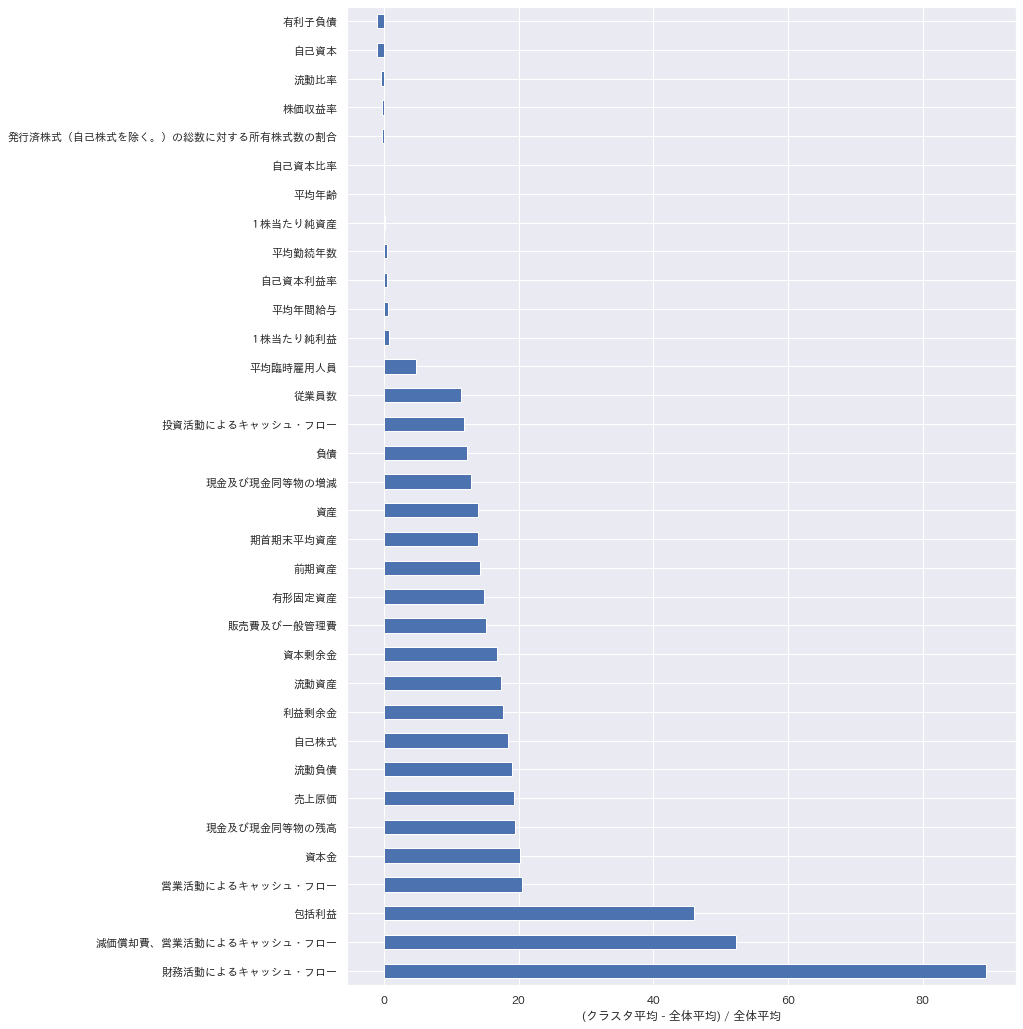

                       会社名      業種
証券コード                             
2502.0     アサヒグループホールディングス     食料品
2503.0         キリンホールディングス     食料品
2914.0             日本たばこ産業     食料品
4005.0                住友化学      化学
4188.0      三菱ケミカルホールディングス      化学
4502.0              武田薬品工業     医薬品
5401.0                日本製鉄      鉄鋼
5411.0  ジェイ　エフ　イー　ホールディングス      鉄鋼
6702.0                 富士通    電気機器
6902.0                デンソー   輸送用機器
7011.0               三菱重工業      機械
7270.0              ＳＵＢＡＲＵ   輸送用機器
8002.0                  丸紅     卸売業
8015.0                豊田通商     卸売業
8031.0                三井物産     卸売業
8053.0                住友商事     卸売業
9437.0              ＮＴＴドコモ  情報・通信業
14 companies in cluster 57


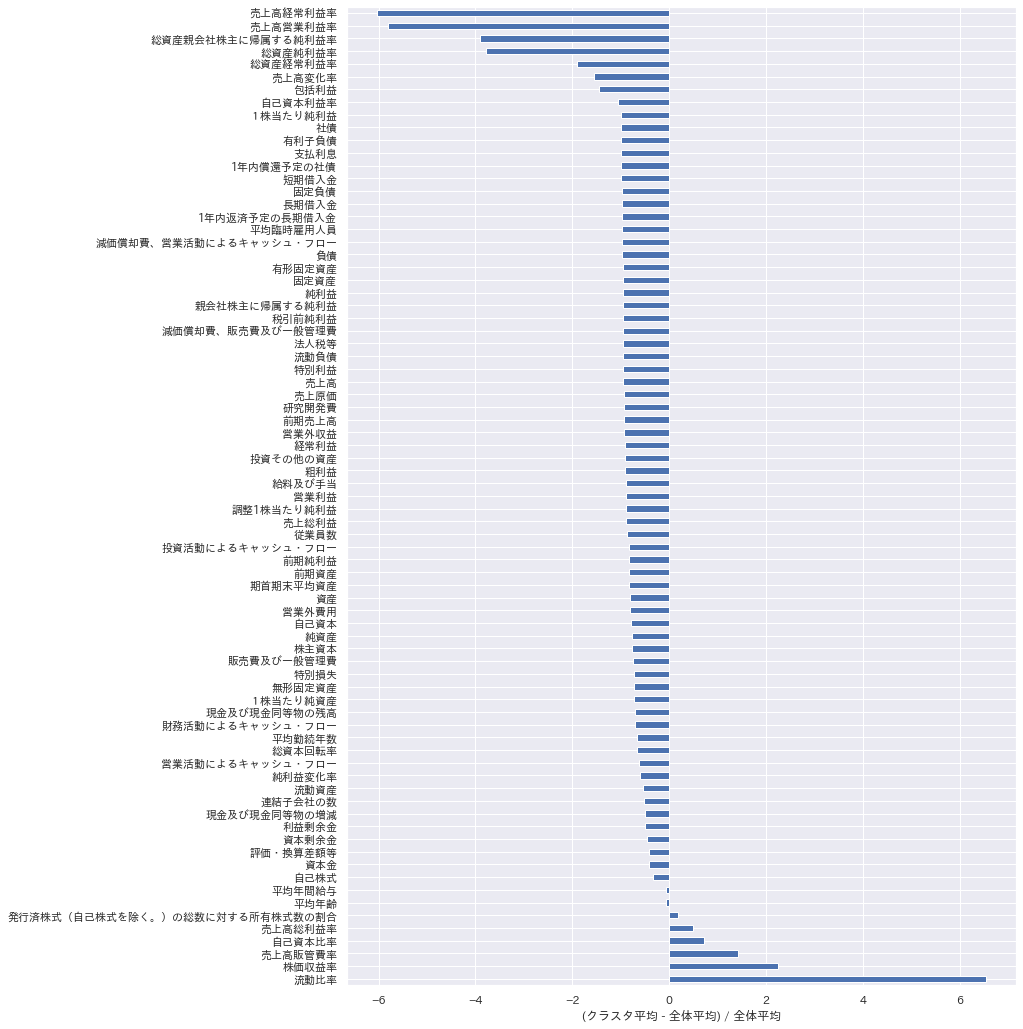

                     会社名      業種
証券コード                           
2193.0            クックパッド   サービス業
2338.0         ビットワングループ  情報・通信業
2497.0            ユナイテッド   サービス業
3659.0              ネクソン  情報・通信業
3668.0              コロプラ  情報・通信業
3686.0         ディー・エル・イー  情報・通信業
3770.0             ザッパラス  情報・通信業
3993.0  ＰＫＳＨＡ　Ｔｅｃｈｎｏｌｏｇｙ  情報・通信業
4596.0      窪田製薬ホールディングス     医薬品
4813.0            ＡＣＣＥＳＳ  情報・通信業
4978.0             リプロセル      化学
6620.0        宮越ホールディングス    電気機器
6696.0             トランザス    電気機器
7779.0         ＣＹＢＥＲＤＹＮＥ    精密機器


In [142]:

for cluster_label in df_cluster['cluster_kmean_60'].value_counts().sort_values(ascending=False).index[:40]:
    describe_cluster_characteristic(cluster_label, df_feat_cluster)
    print('='*60)